Data Preparation

*   Concatenation of all datasets
*   Data type transformation
*   Missing value detection
*   Data Resampling
*   Missing Value Imputation
*   Feature Selection









In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_may21 = pd.read_csv('/content/df_may21.csv')
df_jun21 = pd.read_csv('/content/df_jun21.csv')
df_jul21 = pd.read_csv('/content/df_jul21.csv')
df_aug21 = pd.read_csv('/content/df_aug21.csv')
df_sep21 = pd.read_csv('/content/df_sep21.csv')
df_oct21 = pd.read_csv('/content/df_oct21.csv')
df_nov21 = pd.read_csv('/content/df_nov21.csv')
df_dec21 = pd.read_csv('/content/df_dec21.csv')
df_jan22 = pd.read_csv('/content/df_jan22.csv')
df_feb22 = pd.read_csv('/content/df_feb22.csv')
df_mac22 = pd.read_csv('/content/df_mac22.csv')
df_apr22 = pd.read_csv('/content/df_apr22.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,19,20,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df = pd.concat([df_may21,df_jun21,df_jul21,df_aug21,df_sep21,df_oct21,df_nov21,df_dec21,df_jan22,df_feb22,df_mac22,df_apr22], axis=0)
df.head()

date_time daily power yields nominal power output  \
0  2021-05-09 00:00:00            136.800                0.000   
1  2021-05-09 00:01:00            136.800                0.000   
2  2021-05-09 00:02:00            136.800                0.000   
3  2021-05-09 00:03:00              0.000                0.000   
4  2021-05-09 00:04:00              0.000                0.000   

  total power yields total running time dc voltage 1 dc current 1  \
0          92429.000           7235.000        0.000        0.000   
1          92429.000           7235.000        0.000        0.000   
2          92429.000           7235.000        0.000        0.000   
3          92429.000           7235.000        0.000        0.000   
4          92429.000           7235.000        0.000        0.000   

  dc voltage 2 dc current 2 dc voltage 3  ... phase C voltage phase A current  \
0        0.000        0.000        0.000  ...           0.000           0.000   
1        0.000        0.000        0.000  ...           0.000           0.000   
2        0.000        0.000        0.000  ...           0.000           0.000   
3        0.000        0.000        0.000  ...           0.000           0.000   
4        0.000        0.000        0.000  ...           0.000           0.000   

  phase B current phase C current total active power temperature  \
0           0.000           0.000              0.000       23.90   
1           0.000           0.000              0.000       24.00   
2           0.000           0.000              0.000       24.00   
3           0.000           0.000              0.000       23.90   
4           0.000           0.000              0.000       23.90   

  ring temperature wind speed soil moisture wet ring  
0            26.20       0.00       1647.00   551.00  
1            26.20       0.00       1645.00   550.00  
2            26.20       0.00       1645.00   550.00  
3            26.20       0.00       1645.00   550.00  
4            26.20       0.00       1645.00   550.00  

[5 rows x 24 columns]

The raw data contains 24 features with 365940 rows in minute interval.
Later, the dataset becomes 22 features, as the date and time converted to index.

In [ ]:
df.shape

(365940, 24)

In [ ]:
df.to_csv('df.csv')

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.set_index('date_time',inplace=True)

The data type obtained from the raw dataset is object/string.
The data converted to numeric.

In [ ]:
col = ['daily power yields','nominal power output','total power yields', 'total running time',
       'dc voltage 1','dc current 1','dc voltage 2','dc current 2','dc voltage 3',
       'dc current 3','total dc power','phase A voltage','phase B voltage',
       'phase C voltage','phase A current','phase B current',
       'phase C current','total active power','temperature','ring temperature',
       'wind speed','soil moisture','wet ring']
df[col] = df[col].apply(pd.to_numeric,errors='coerce')

In [ ]:
df.isnull().sum()

daily power yields      10228
nominal power output    10199
total power yields      10244
total running time      10270
dc voltage 1            10292
dc current 1            10316
dc voltage 2            10344
dc current 2            10358
dc voltage 3            10383
dc current 3            10403
total dc power          10425
phase A voltage         10447
phase B voltage         10464
phase C voltage         10483
phase A current         10502
phase B current         10515
phase C current         10532
total active power      10563
temperature               943
ring temperature          943
wind speed                943
soil moisture             946
wet ring                  946
dtype: int64

Each feature has null value percentage less than 5%. 
Meaning that, the null value can be removed with minimum impact to the data distribution.

In [ ]:
col = ['daily power yields','nominal power output','total power yields', 'total running time',
       'dc voltage 1','dc current 1','dc voltage 2','dc current 2','dc voltage 3',
       'dc current 3','total dc power','phase A voltage','phase B voltage',
       'phase C voltage','phase A current','phase B current',
       'phase C current','total active power','temperature','ring temperature',
       'wind speed','soil moisture','wet ring']

for i in col:
  pct_missing = (df[i].isnull().sum()/len(df[i]))*100
  print('Missing data percentage for'+' '+i+' '+'is', round(pct_missing,2),'%')

Missing data percentage for daily power yields is 2.79 %
Missing data percentage for nominal power output is 2.79 %
Missing data percentage for total power yields is 2.8 %
Missing data percentage for total running time is 2.81 %
Missing data percentage for dc voltage 1 is 2.81 %
Missing data percentage for dc current 1 is 2.82 %
Missing data percentage for dc voltage 2 is 2.83 %
Missing data percentage for dc current 2 is 2.83 %
Missing data percentage for dc voltage 3 is 2.84 %
Missing data percentage for dc current 3 is 2.84 %
Missing data percentage for total dc power is 2.85 %
Missing data percentage for phase A voltage is 2.85 %
Missing data percentage for phase B voltage is 2.86 %
Missing data percentage for phase C voltage is 2.86 %
Missing data percentage for phase A current is 2.87 %
Missing data percentage for phase B current is 2.87 %
Missing data percentage for phase C current is 2.88 %
Missing data percentage for total active power is 2.89 %
Missing data percentage for tem

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365940 entries, 2021-05-09 00:00:00 to 2022-04-28 23:59:00
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   daily power yields    355712 non-null  float64
 1   nominal power output  355741 non-null  float64
 2   total power yields    355696 non-null  float64
 3   total running time    355670 non-null  float64
 4   dc voltage 1          355648 non-null  float64
 5   dc current 1          355624 non-null  float64
 6   dc voltage 2          355596 non-null  float64
 7   dc current 2          355582 non-null  float64
 8   dc voltage 3          355557 non-null  float64
 9   dc current 3          355537 non-null  float64
 10  total dc power        355515 non-null  float64
 11  phase A voltage       355493 non-null  float64
 12  phase B voltage       355476 non-null  float64
 13  phase C voltage       355457 non-null  float64
 14  phase A current   

Features Description

* Nominal Power Output : Maximum power output from PV
* Daily Power Yields : Accumulated power generated daily
* Total Power Yields : Accumulated power generated from day one
* DC voltage : Direct Current Voltage. Voltage division is the result of distributing the input voltage among the components of the divider.
* DC current : Direct current  current. Current division is the result of voltage distribution, which depends on the components in the circuit.
* Total DC power : total direct current power
* Phase voltage : AC voltage after inverter. Three-phase power can be defined as the common method of alternating current power generation, transmission, and distribution.
* Phase current : AC current after inverter
* Total active power : Total actual working power
* Temperature : Ambient temperature
* Ring temperature : Temperature around the module
* Soil moisture : Moisture content of the soil surface



In [ ]:
df.describe()

daily power yields  nominal power output  total power yields  \
count       355712.000000         355741.000000       355696.000000   
mean            71.149874             19.352956       117154.013734   
std             70.998201             17.949106        16108.537872   
min              0.000000              0.000000        92429.000000   
25%              0.000000              0.000000       101787.000000   
50%             52.700000             36.000000       115737.000000   
75%            139.300000             36.000000       130639.250000   
max            216.400000             36.000000       145028.000000   

       total running time   dc voltage 1   dc current 1   dc voltage 2  \
count       355670.000000  355648.000000  355624.000000  355596.000000   
mean          9198.298566     342.062783       3.219439     341.945121   
std           1271.850958     322.580494       5.048045     321.606237   
min           7235.000000       0.000000       0.000000       0.000000   
25%           7995.000000       0.000000       0.000000       0.000000   
50%           9082.000000     586.000000       0.000000     585.400000   
75%          10286.000000     648.700000       5.200000     646.200000   
max          11375.000000     836.300000      22.700000     835.100000   

        dc current 2   dc voltage 3   dc current 3  ...  phase C voltage  \
count  355582.000000  355557.000000  355537.000000  ...    355457.000000   
mean        3.426778     340.228027       3.681132  ...       125.101299   
std         5.300826     320.491502       5.848372  ...       122.557510   
min         0.000000       0.000000       0.000000  ...         0.000000   
25%         0.000000       0.000000       0.000000  ...         0.000000   
50%         0.000000     579.500000       0.000000  ...       240.400000   
75%         5.400000     645.600000       5.800000  ...       245.400000   
max        24.200000     834.700000      37.365000  ...       251.800000   

       phase A current  phase B current  phase C current  total active power  \
count    355438.000000    355425.000000    355408.000000       355377.000000   
mean          8.487859         8.499272         8.494754            6.267437   
std          12.748183        12.762227        12.767005            9.455176   
min           0.000000         0.000000         0.000000            0.000000   
25%           0.000000         0.000000         0.000000            0.000000   
50%           0.000000         0.000000         0.000000            0.000000   
75%          14.300000        14.400000        14.400000           10.583000   
max          49.800000        49.800000        49.900000           36.353000   

         temperature  ring temperature     wind speed  soil moisture  \
count  364997.000000     364997.000000  364997.000000  364994.000000   
mean       14.953682         28.878058       0.671917     792.973337   
std        15.833225          3.845960       0.858637     875.716265   
min         0.000000         22.400000       0.000000       0.000000   
25%         0.000000         25.600000       0.000000       0.000000   
50%         0.000000         27.600000       0.400000      14.000000   
75%        26.300000         32.200000       1.000000    1602.000000   
max        56.300000         40.100000      10.700000    2603.000000   

            wet ring  
count  364994.000000  
mean      208.952449  
std       216.201232  
min         0.000000  
25%         0.000000  
50%       107.000000  
75%       437.000000  
max       625.000000  

[8 rows x 23 columns]

Based on the time plot :
* nominal power output produces only two readings : 0 and 35 kW
* dc voltage ranges from 0 v to 800 v
* dc current ranges from 0 A to 20 A for each division.
* total dc power ranges from 0 to 40 kW
* phase voltage (A,B,C) ranges from 0 to 800 V
* phase current (A,B,C) ranges from 0 to 50 A
* total active power ranges from 0 to 35 kW
* temperature shows problem in temperature detection. most of the temperature readings are zero.
* wind speed renges from 0 to 10 m/s

nominal power output


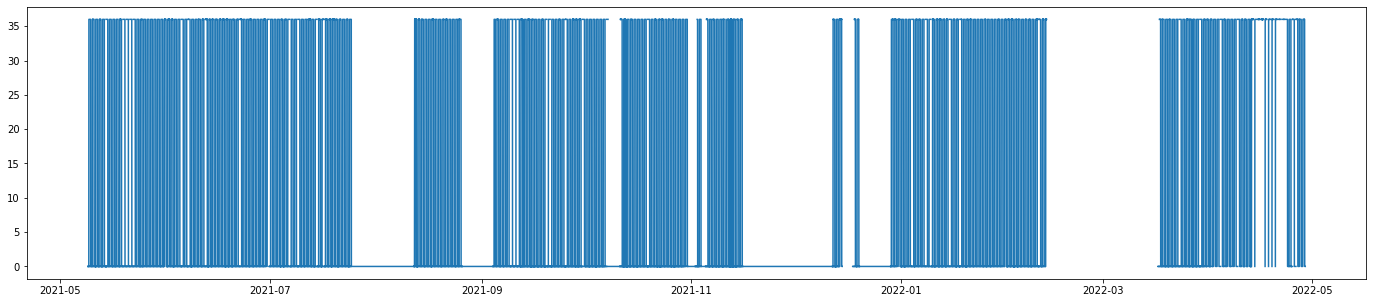

dc voltage 1


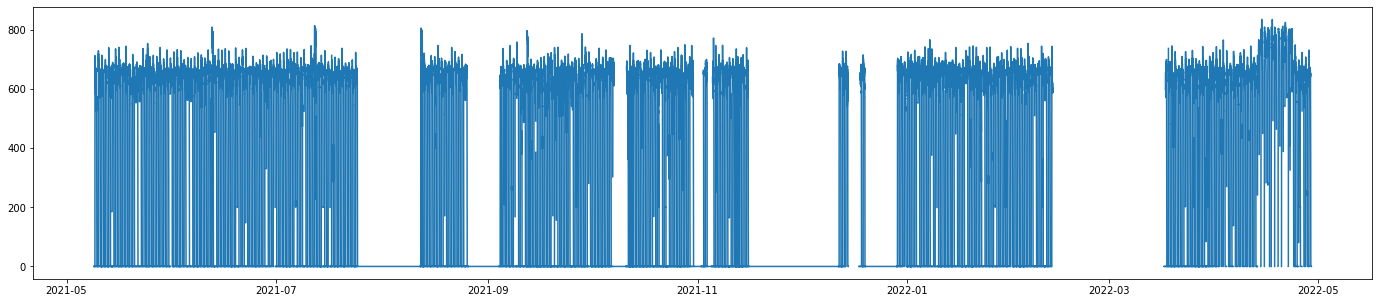

dc current 1


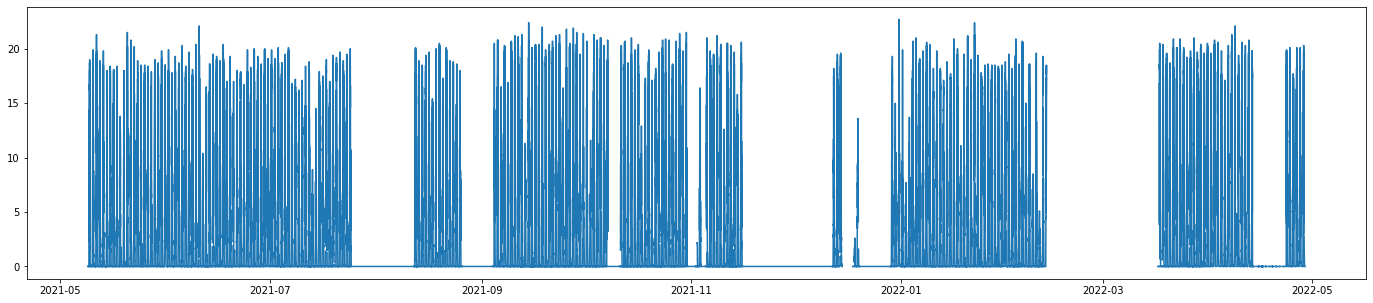

dc voltage 2


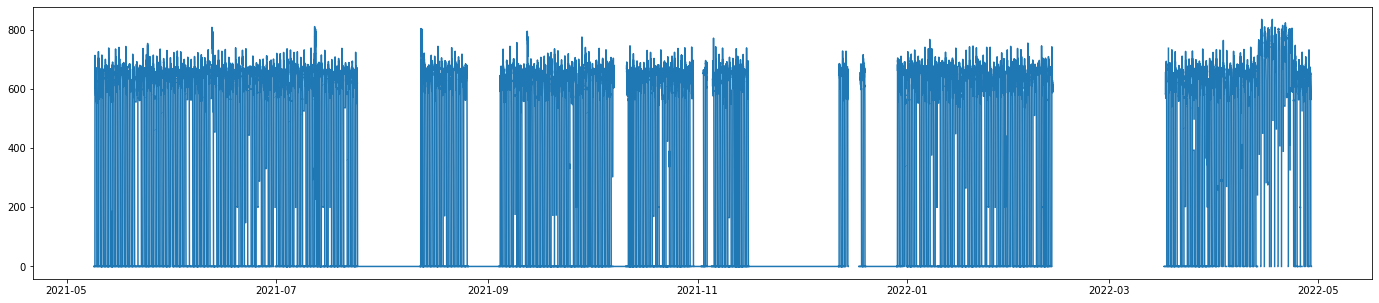

dc current 2


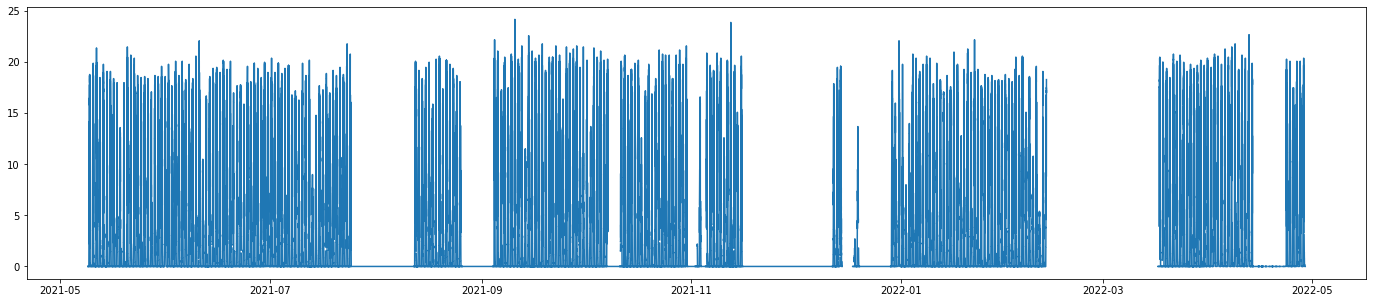

dc voltage 3


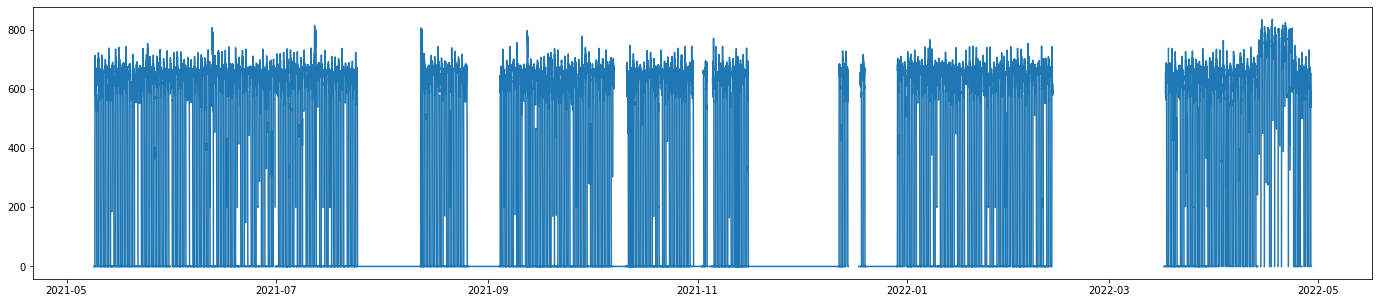

dc current 3


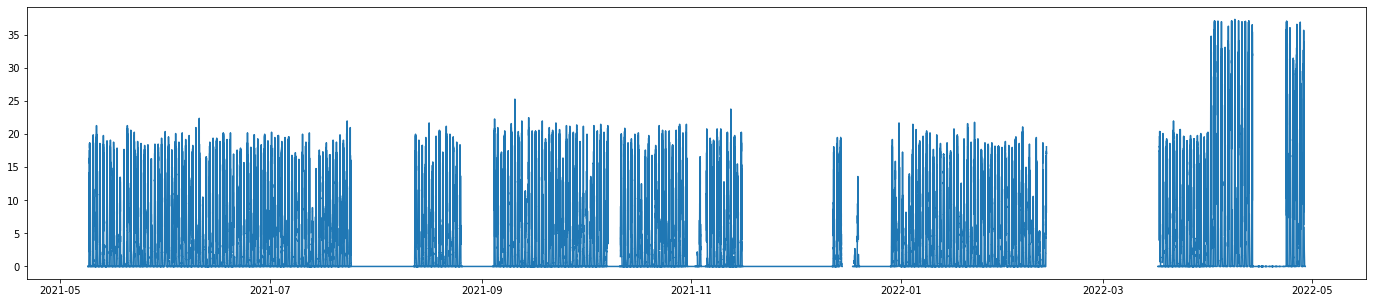

total dc power


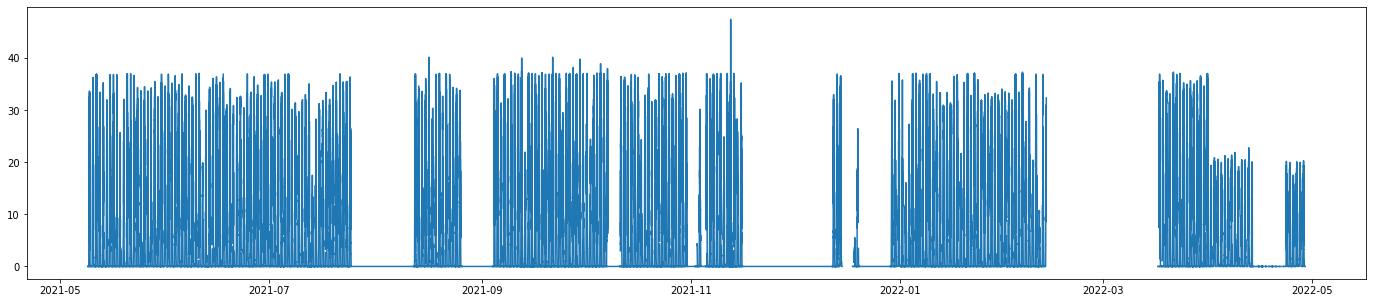

phase A voltage


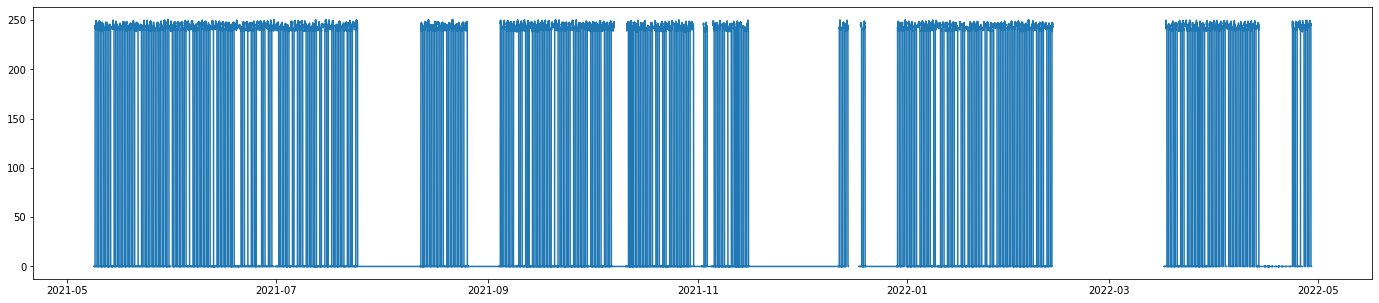

phase B voltage


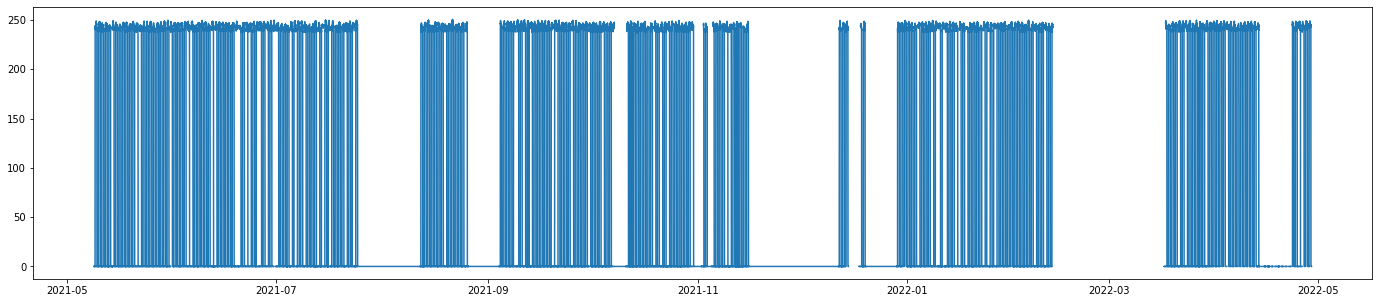

phase C voltage


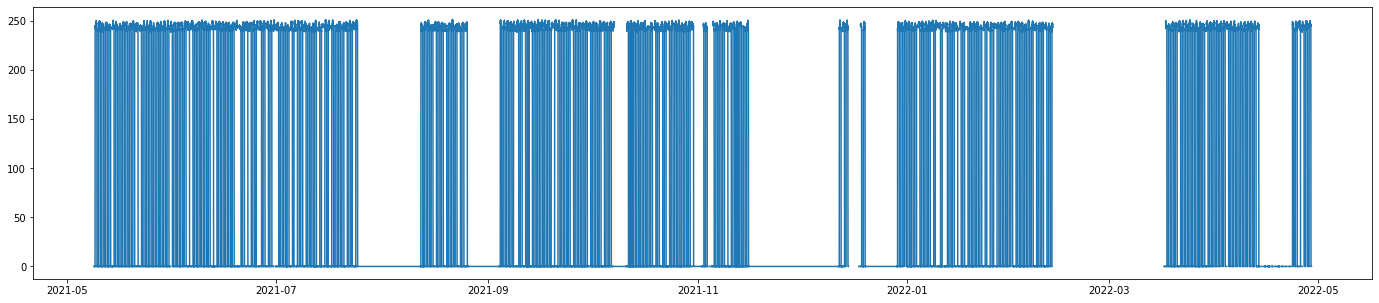

phase A current


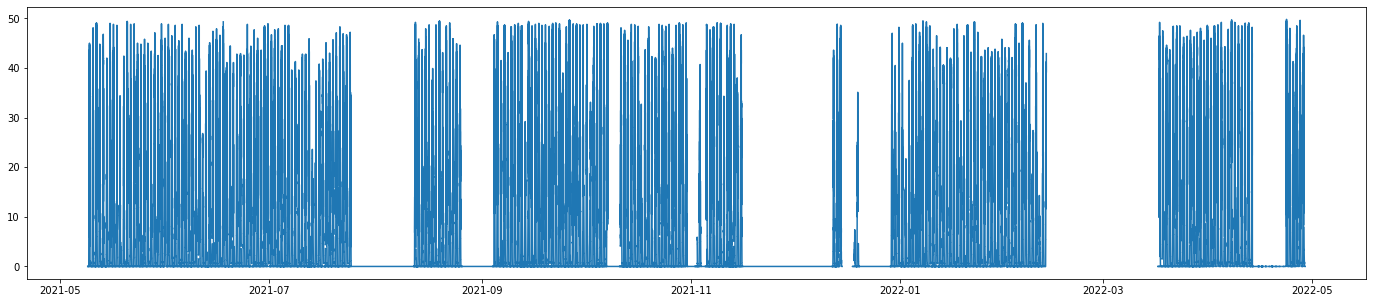

phase B current


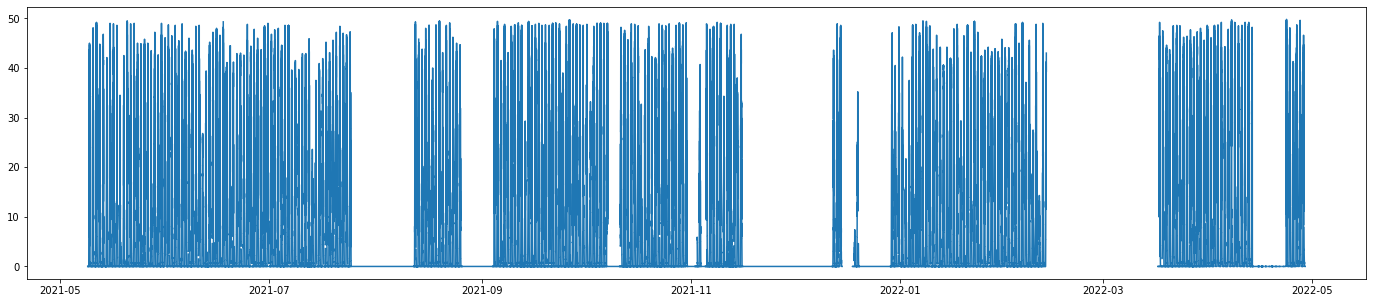

phase C current


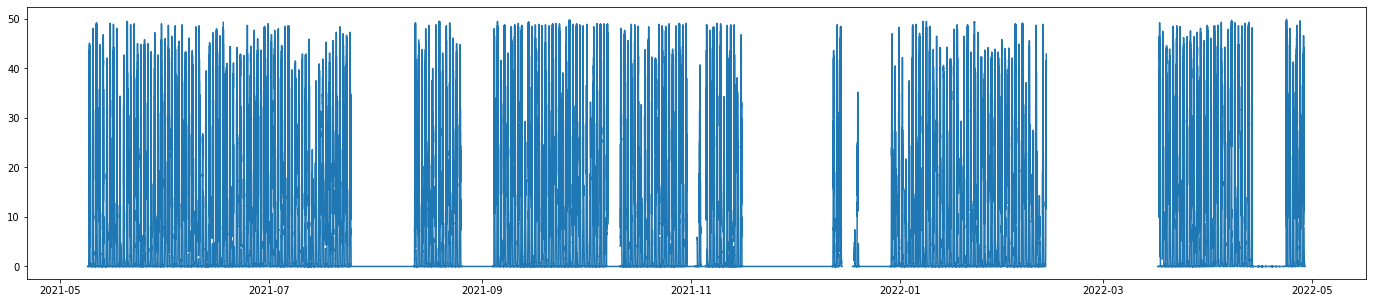

total active power


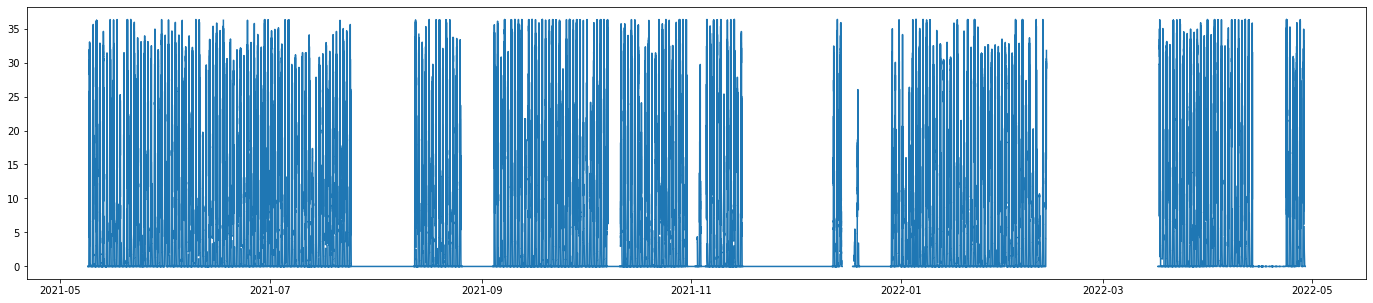

temperature


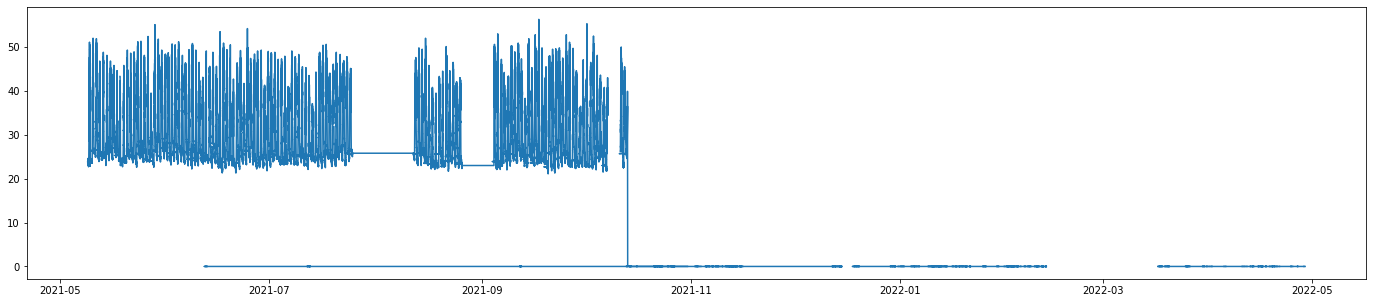

ring temperature


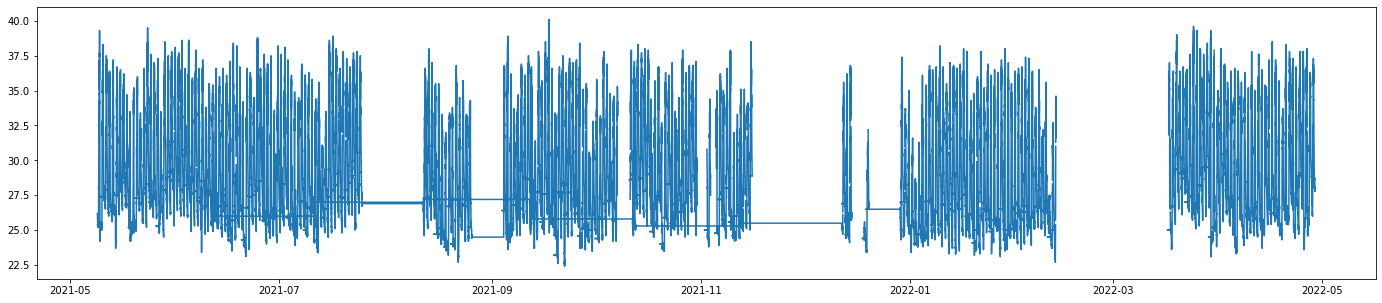

wind speed


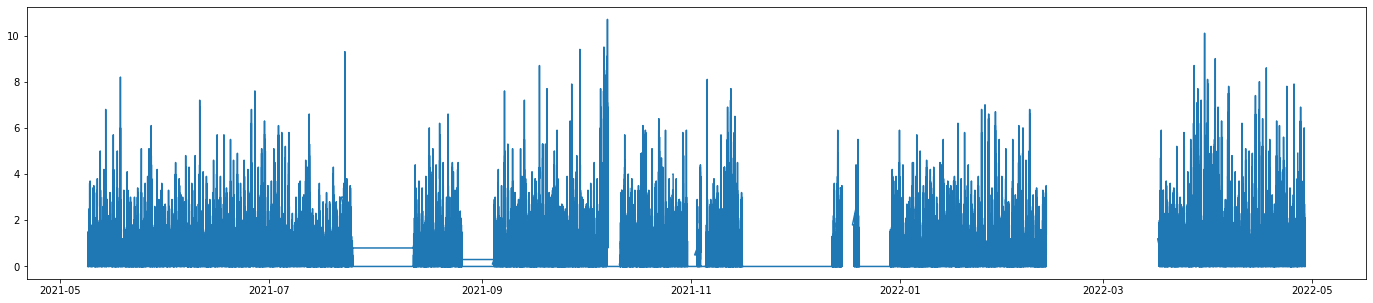

soil moisture


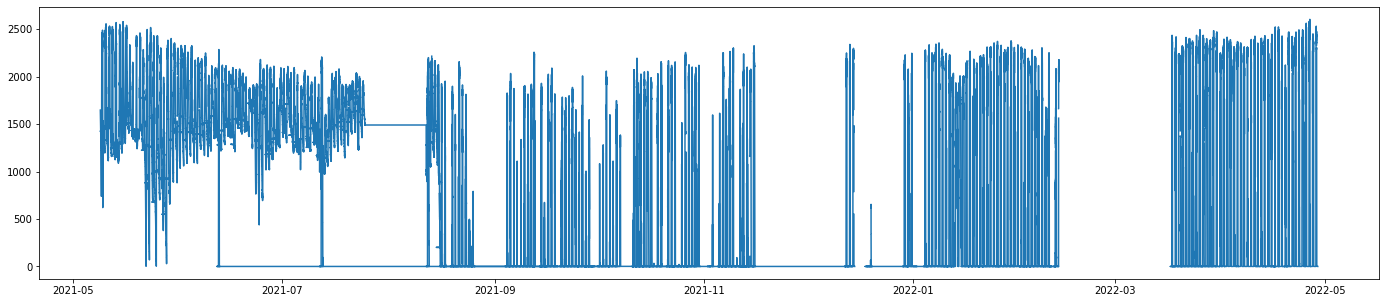

wet ring


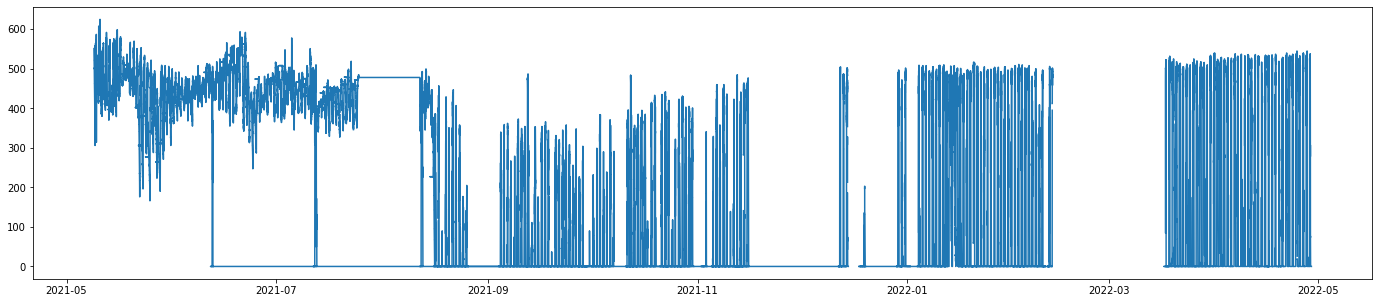

In [ ]:
cols = ['daily power yields','nominal power output',
       'dc voltage 1','dc current 1','dc voltage 2','dc current 2','dc voltage 3',
       'dc current 3','total dc power','phase A voltage','phase B voltage',
       'phase C voltage','phase A current','phase B current',
       'phase C current','total active power','temperature','ring temperature',
       'wind speed','soil moisture','wet ring']

for i in cols[1:]:
    print(i)
    plt.figure(figsize=(24, 5))
    plt.plot(df[i])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


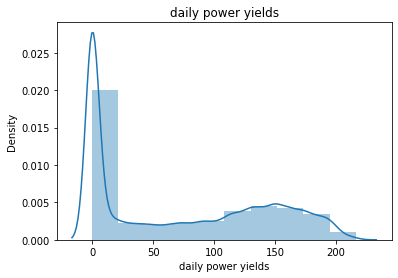

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


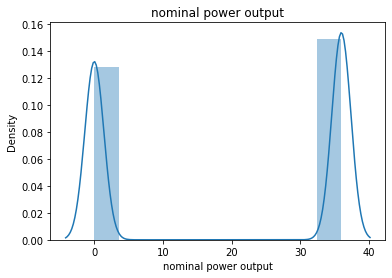

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


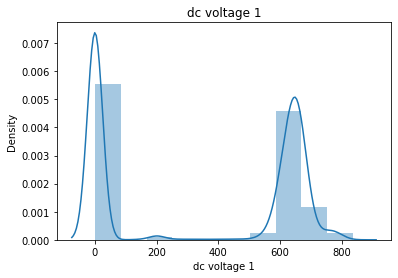

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


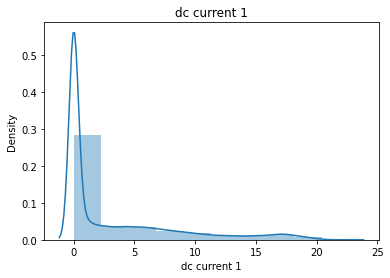

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


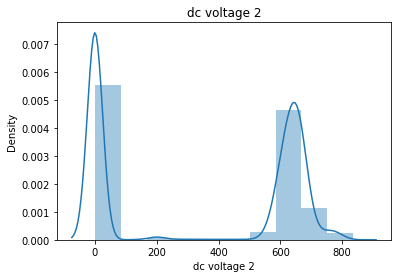

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


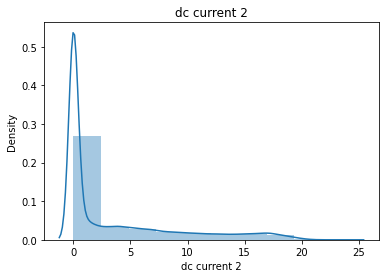

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


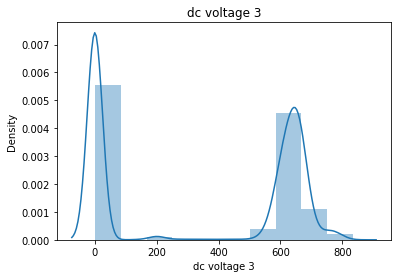

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


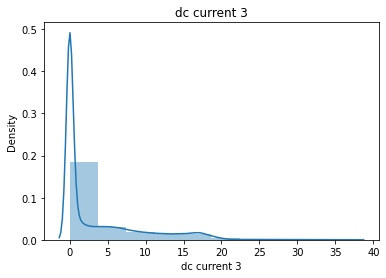

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


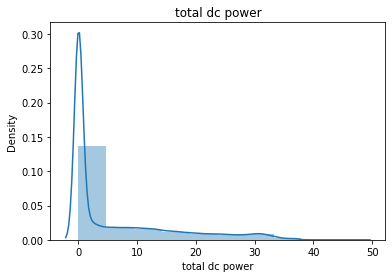

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


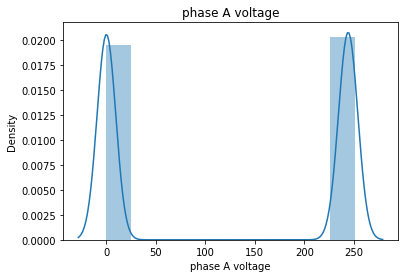

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


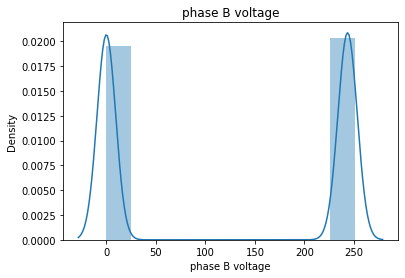

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


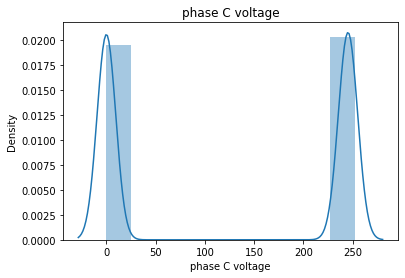

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


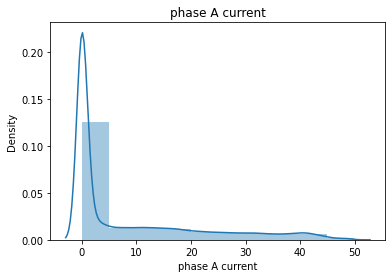

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


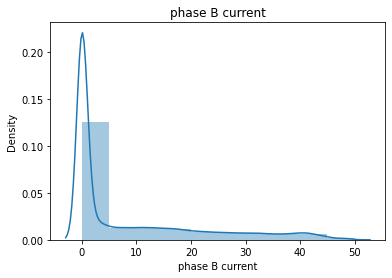

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


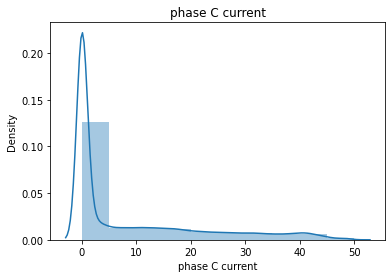

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


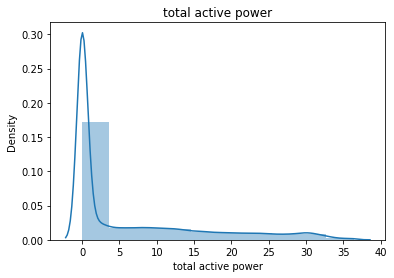

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


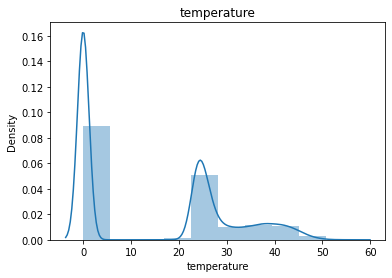

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


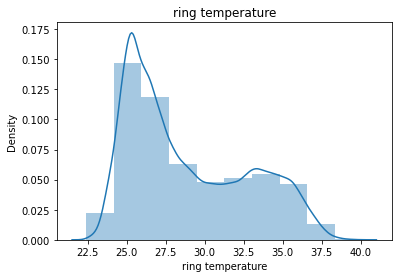

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


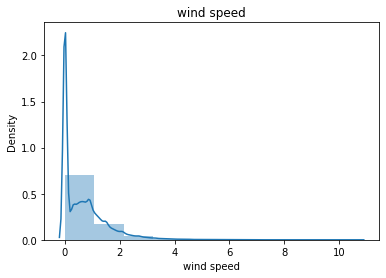

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


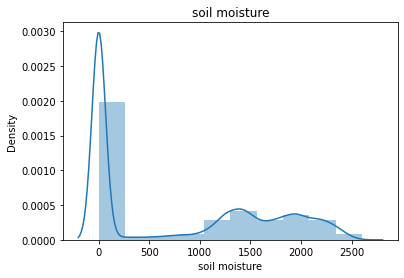

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


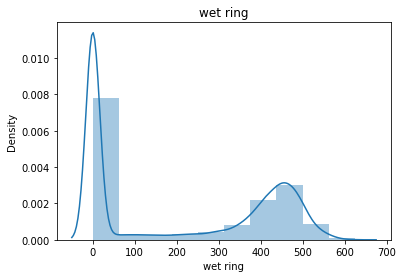

In [ ]:
col = ['daily power yields','nominal power output',
       'dc voltage 1','dc current 1','dc voltage 2','dc current 2','dc voltage 3',
       'dc current 3','total dc power','phase A voltage','phase B voltage',
       'phase C voltage','phase A current','phase B current',
       'phase C current','total active power','temperature','ring temperature',
       'wind speed','soil moisture','wet ring']

for i in col:
  sns.distplot(df[i], bins=10)
  plt.title(i)
  plt.show()

nominal power output


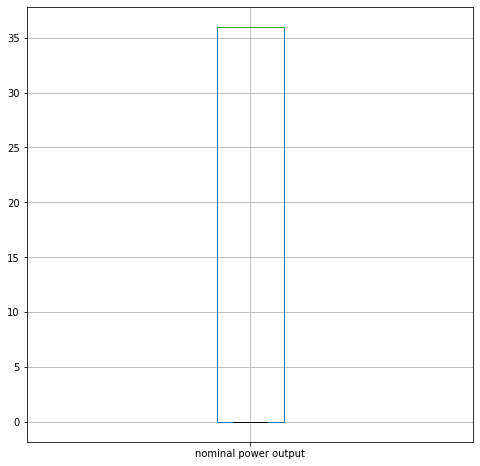

dc voltage 1


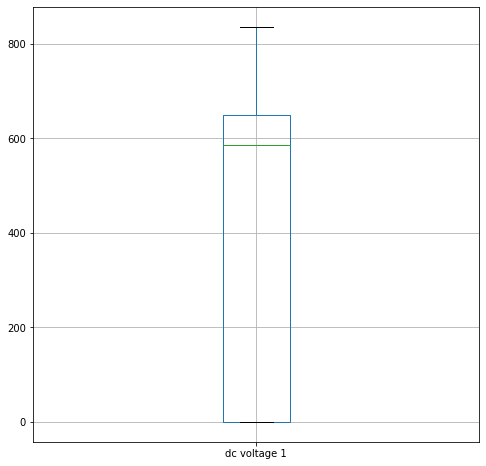

dc current 1


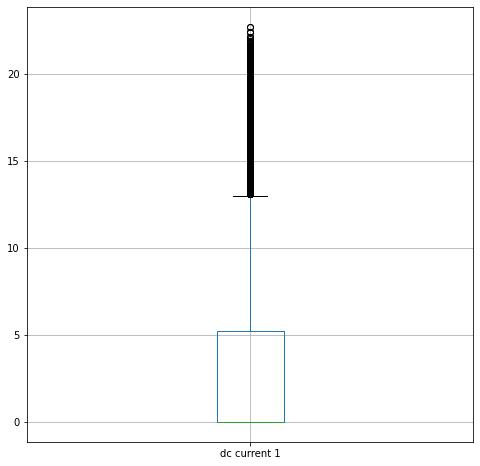

dc voltage 2


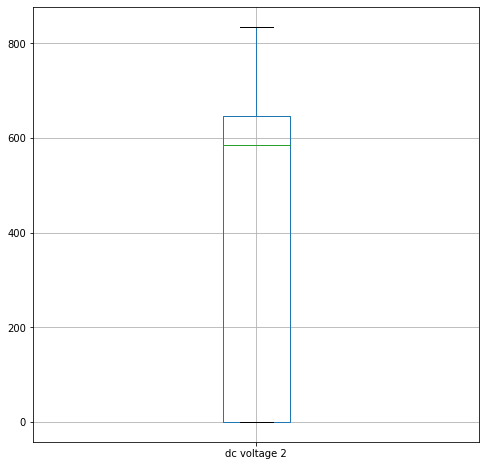

dc current 2


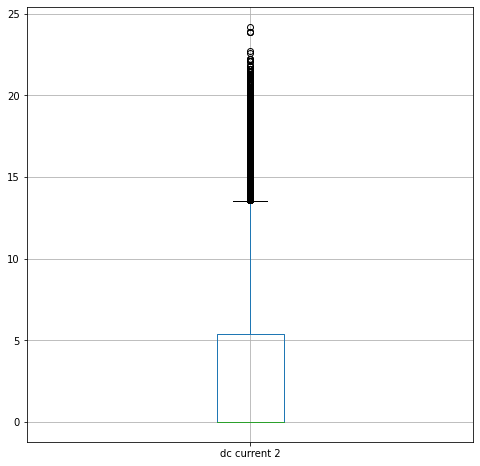

dc voltage 3


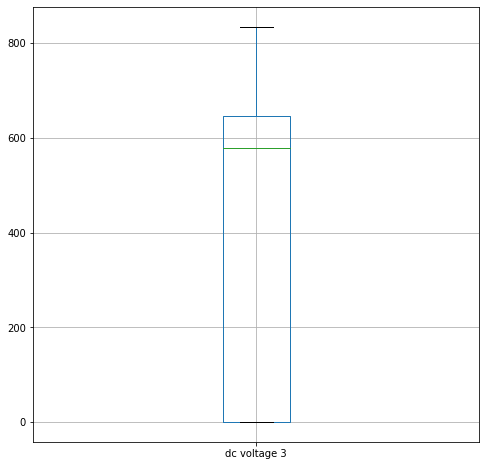

dc current 3


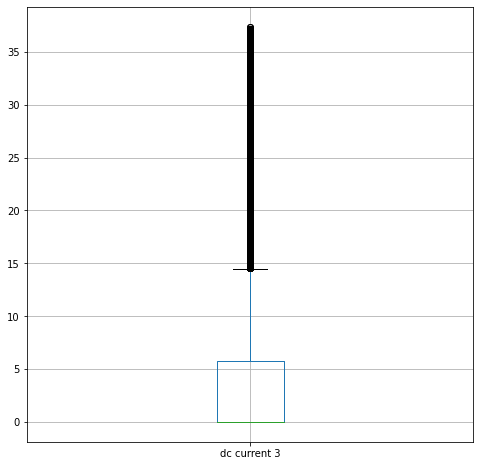

total dc power


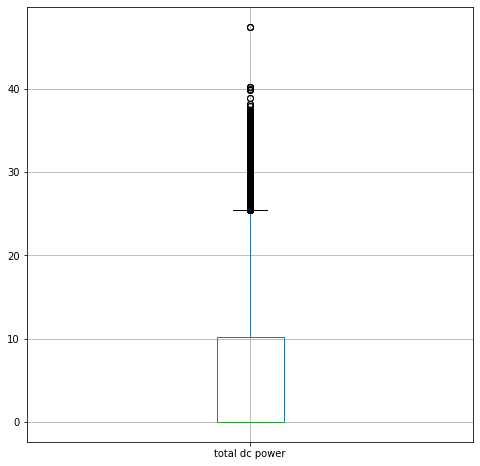

phase A voltage


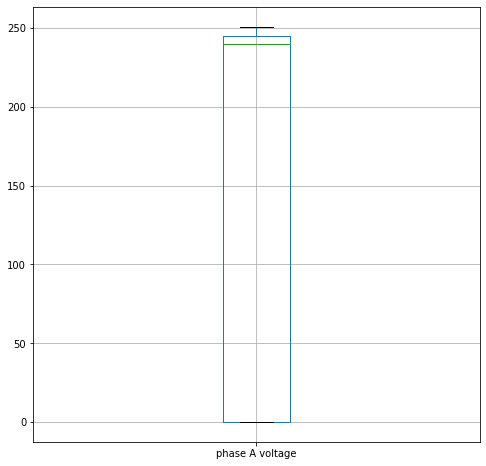

phase B voltage


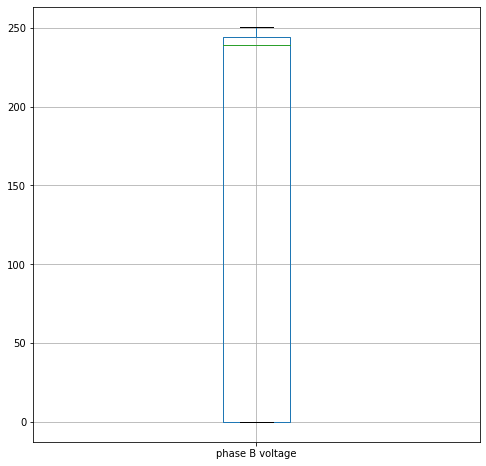

phase C voltage


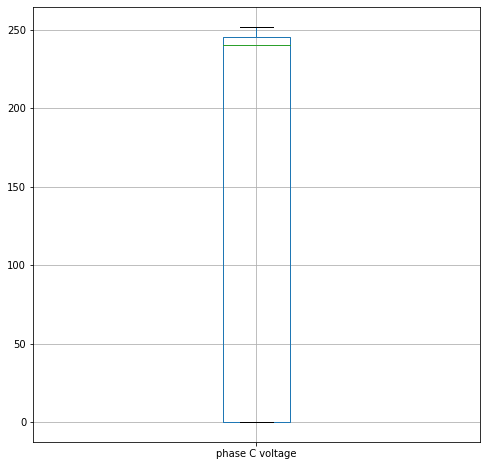

phase A current


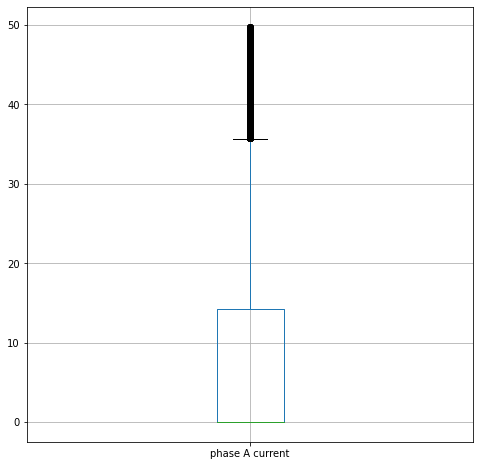

phase B current


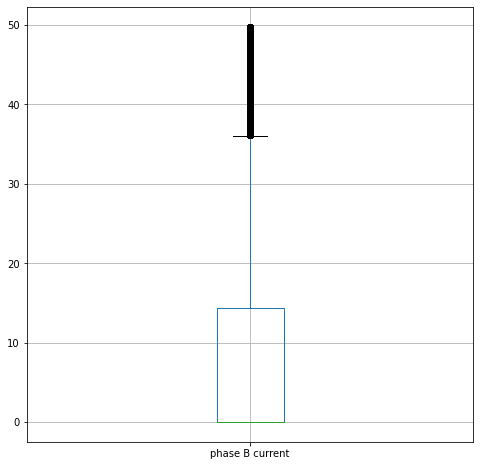

phase C current


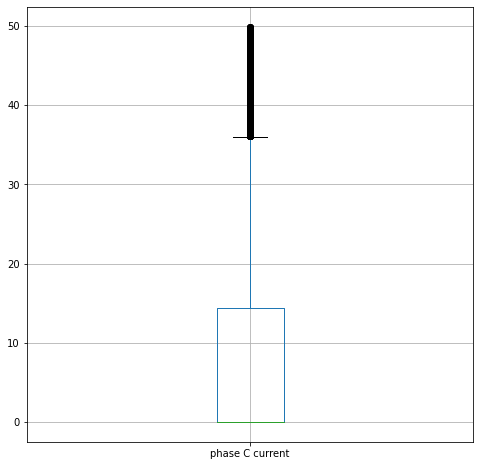

total active power


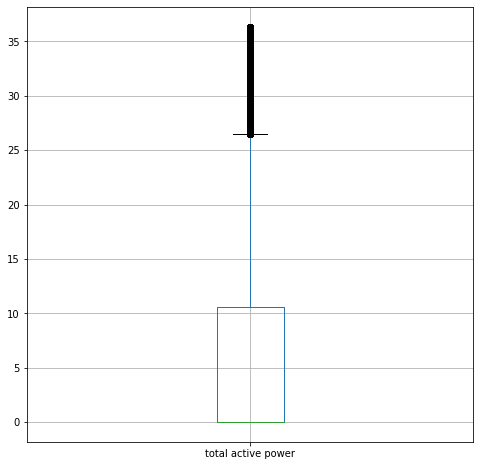

temperature


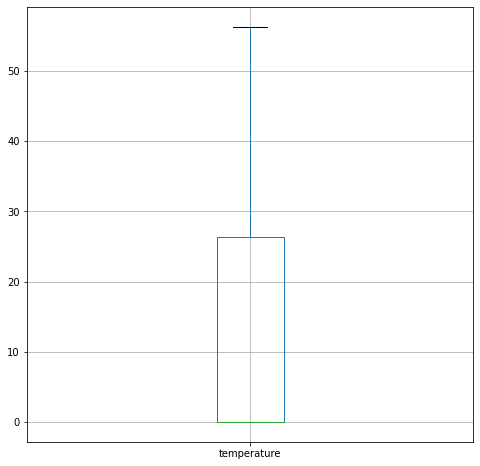

ring temperature


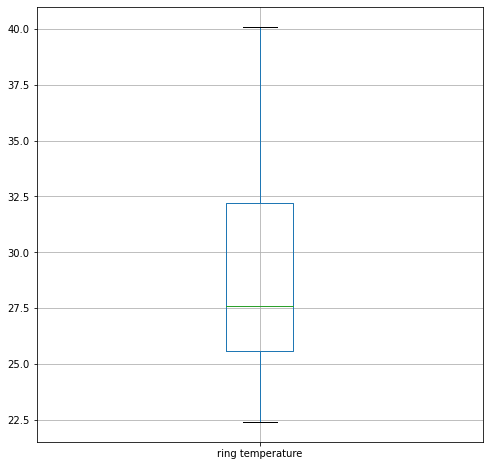

wind speed


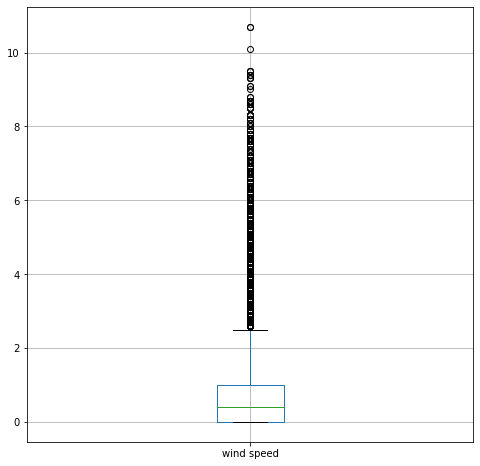

soil moisture


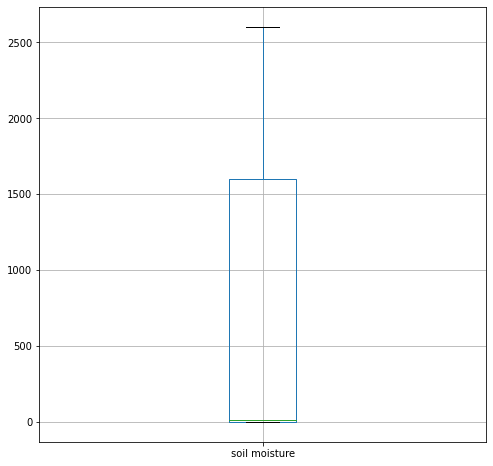

wet ring


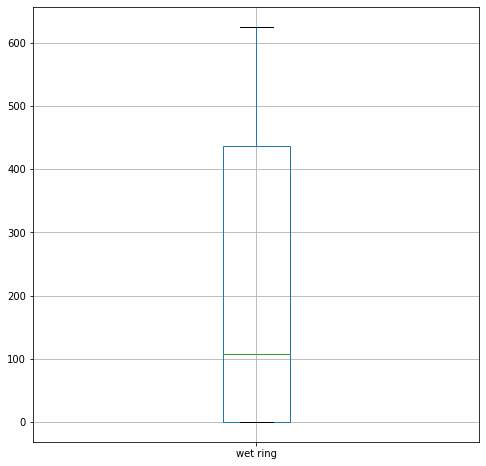

In [ ]:
cols = ['daily power yields','nominal power output',
       'dc voltage 1','dc current 1','dc voltage 2','dc current 2','dc voltage 3',
       'dc current 3','total dc power','phase A voltage','phase B voltage',
       'phase C voltage','phase A current','phase B current',
       'phase C current','total active power','temperature','ring temperature',
       'wind speed','soil moisture','wet ring']

for i in cols[1:]:
    print(i)
    plt.figure(figsize=(8, 8))
    df.boxplot(column=[i])
    plt.show()

In [ ]:
df.duplicated()

date_time
2021-05-09 00:00:00    False
2021-05-09 00:01:00    False
2021-05-09 00:02:00     True
2021-05-09 00:03:00    False
2021-05-09 00:04:00     True
                       ...  
2022-04-28 23:55:00     True
2022-04-28 23:56:00    False
2022-04-28 23:57:00    False
2022-04-28 23:58:00     True
2022-04-28 23:59:00     True
Length: 365940, dtype: bool

In [ ]:
duplicate_percent = df.duplicated().sum()/len(df)
print('Percentage of duplicated data = ',duplicate_percent)

Percentage of duplicated data =  0.5693938897086954


In [ ]:
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows are :")
print(duplicateRowsDF)

Duplicate Rows are :
                     daily power yields  nominal power output  \
date_time                                                       
2021-05-09 00:02:00               136.8                   0.0   
2021-05-09 00:04:00                 0.0                   0.0   
2021-05-09 00:06:00                 0.0                   0.0   
2021-05-09 00:07:00                 0.0                   0.0   
2021-05-09 00:08:00                 0.0                   0.0   
...                                 ...                   ...   
2022-04-28 23:53:00               150.7                   0.0   
2022-04-28 23:54:00               150.7                   0.0   
2022-04-28 23:55:00               150.7                   0.0   
2022-04-28 23:58:00                 0.0                   0.0   
2022-04-28 23:59:00                 0.0                   0.0   

                     total power yields  total running time  dc voltage 1  \
date_time                                               

In [ ]:
df=df.dropna(axis=0)
df=df.drop(['daily power yields','temperature','total power yields','total running time'],axis=1)

df.isnull().sum()

nominal power output    0
dc voltage 1            0
dc current 1            0
dc voltage 2            0
dc current 2            0
dc voltage 3            0
dc current 3            0
total dc power          0
phase A voltage         0
phase B voltage         0
phase C voltage         0
phase A current         0
phase B current         0
phase C current         0
total active power      0
ring temperature        0
wind speed              0
soil moisture           0
wet ring                0
dtype: int64

In [ ]:
new_cols=['nominal power output','dc voltage 1','dc current 1','dc voltage 2','dc current 2','dc voltage 3',
       'dc current 3','total dc power','phase A voltage','phase B voltage','phase C voltage','phase A current',
       'phase B current','phase C current','ring temperature','wind speed','soil moisture','wet ring',
       'total active power']
df=df[new_cols]

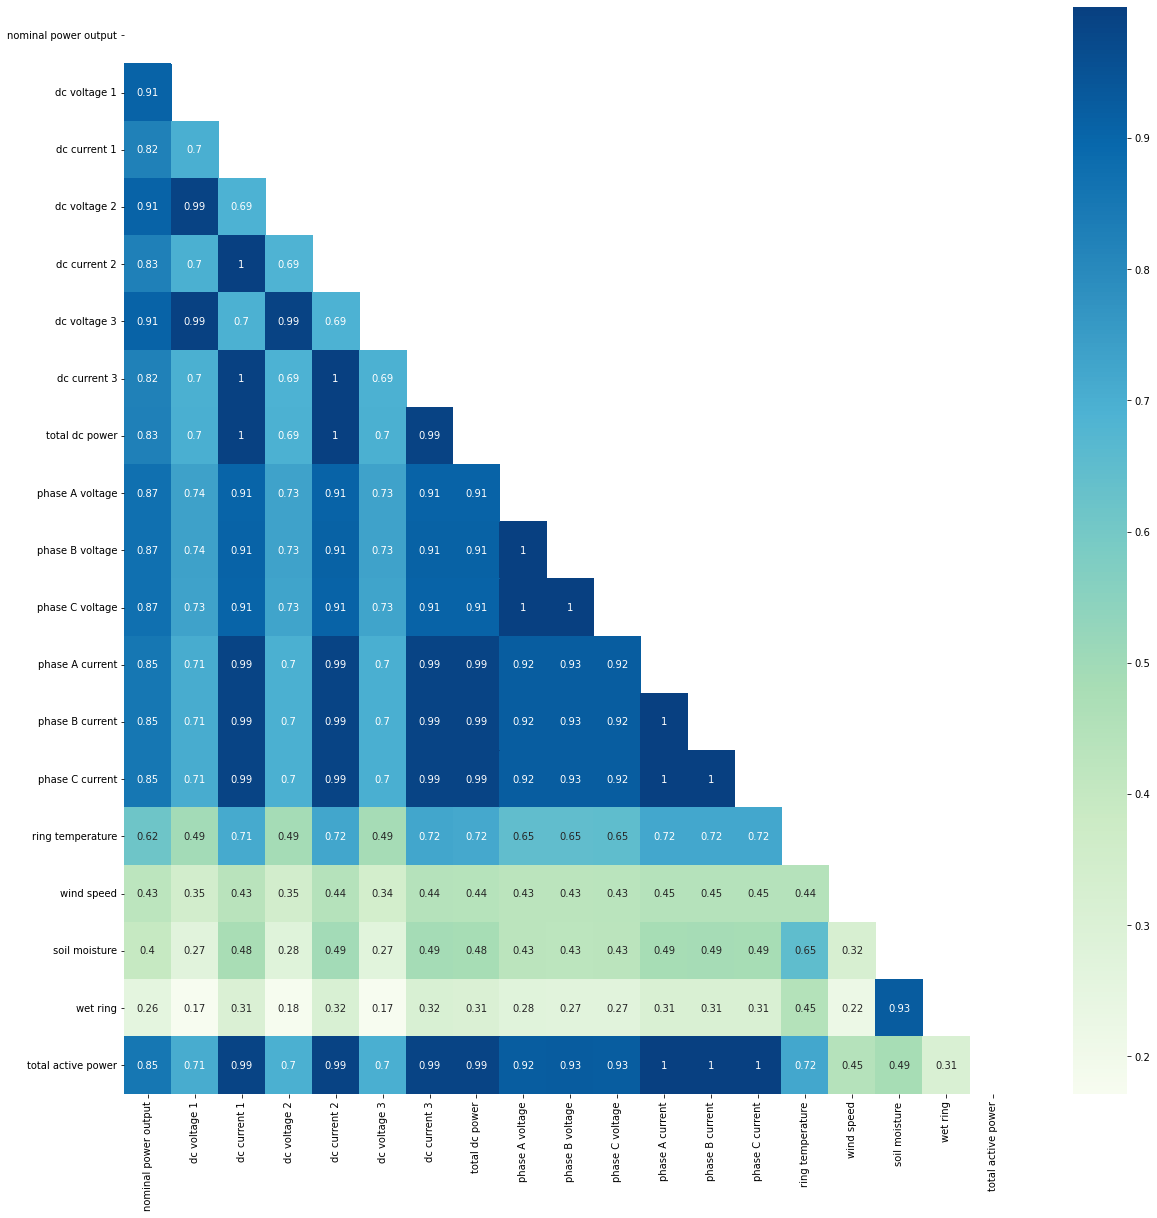

In [ ]:
plt.figure(figsize=(20,20))
corr=df.corr(method='spearman')
matrix = np.triu(corr)
sns.heatmap(corr,cmap='GnBu',annot=True,mask=matrix)

In [ ]:
df=df.drop(['wind speed','soil moisture','wet ring'],axis=1)

In [ ]:
df.describe()

nominal power output   dc voltage 1   dc current 1   dc voltage 2  \
count         355338.000000  355338.000000  355338.000000  355338.000000   
mean              19.365483     342.288583       3.221179     342.124613   
std               17.948158     322.575212       5.048542     321.601873   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       0.000000   
50%               36.000000     586.300000       0.000000     585.600000   
75%               36.000000     648.700000       5.200000     646.200000   
max               36.000000     836.300000      22.700000     835.100000   

        dc current 2   dc voltage 3   dc current 3  total dc power  \
count  355338.000000  355338.000000  355338.000000   355338.000000   
mean        3.428392     340.372941       3.682451        6.130932   
std         5.301371     320.489615       5.848922        9.371618   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.000000       0.000000        0.000000   
50%         0.000000     579.600000       0.000000        0.000000   
75%         5.400000     645.600000       5.800000       10.200000   
max        24.200000     834.700000      37.365000       47.476000   

       phase A voltage  phase B voltage  phase C voltage  phase A current  \
count    355338.000000    355338.000000    355338.000000    355338.000000   
mean        124.758604       124.284512       125.117684         8.488439   
std         122.206545       121.741201       122.557187        12.747965   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%         239.700000       238.800000       240.400000         0.000000   
75%         244.700000       243.800000       245.400000        14.300000   
max         250.900000       250.600000       251.800000        49.800000   

       phase B current  phase C current  ring temperature  total active power  
count    355338.000000    355338.000000     355338.000000       355338.000000  
mean          8.499543         8.494619         28.951042            6.267113  
std          12.761880        12.766491          3.865198            9.454836  
min           0.000000         0.000000         22.400000            0.000000  
25%           0.000000         0.000000         25.700000            0.000000  
50%           0.000000         0.000000         27.800000            0.000000  
75%          14.400000        14.400000         32.300000           10.582000  
max          49.800000        49.900000         40.100000           36.353000

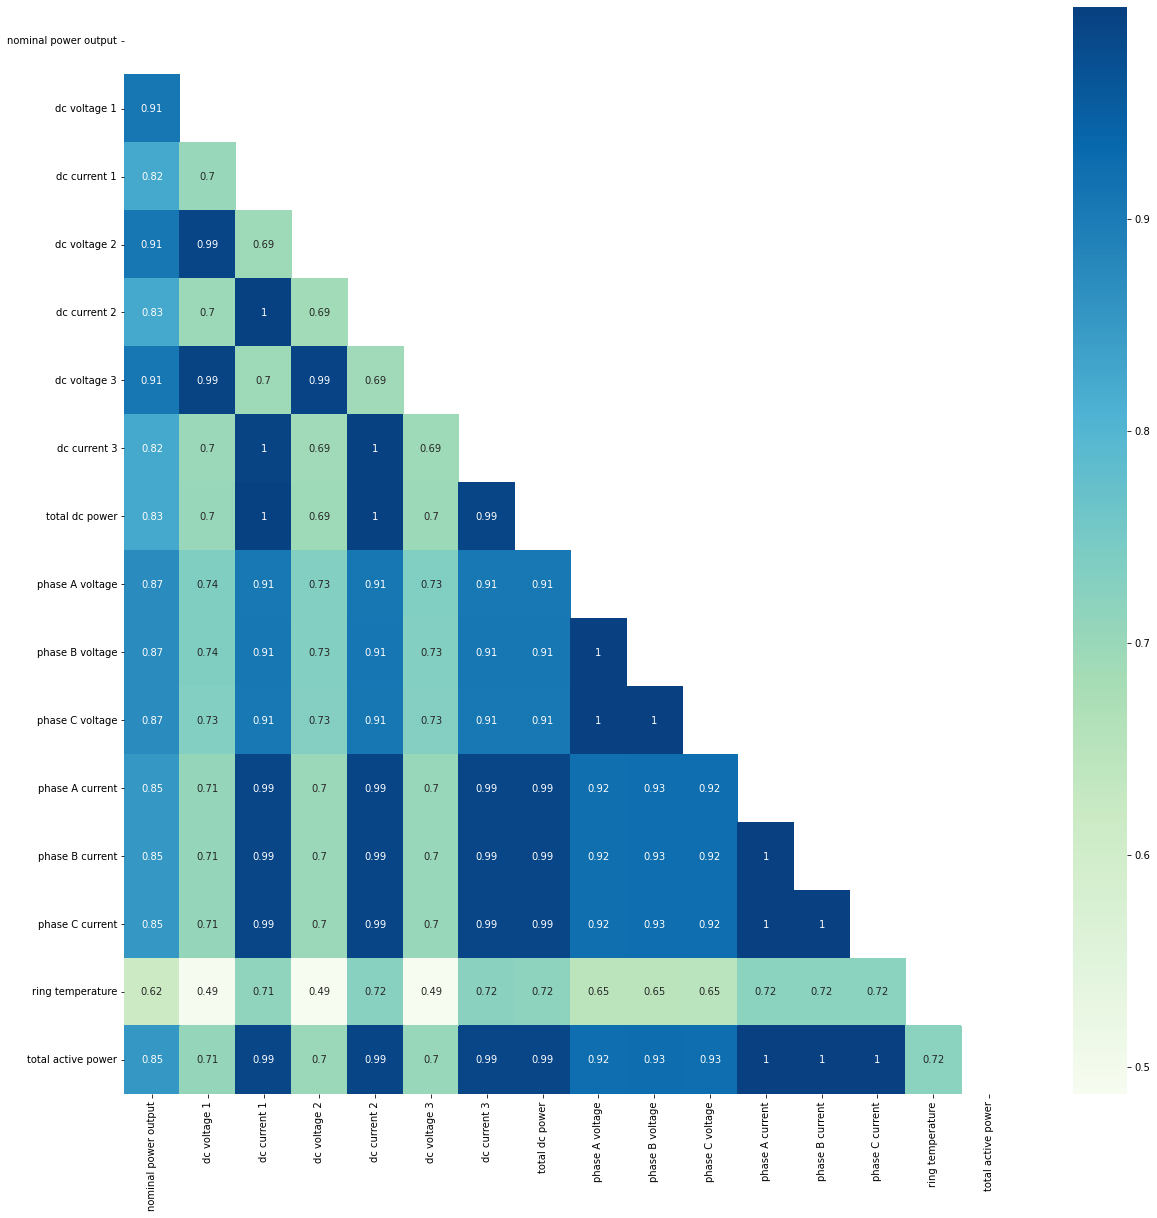

In [ ]:
plt.figure(figsize=(20,20))
corr=df.corr(method='spearman')
matrix = np.triu(corr)
sns.heatmap(corr,cmap='GnBu',annot=True,mask=matrix)

Aggregating the dataset to daily time interval

In [ ]:
# Resampling the time series data based on daily
# 'D' indicates daily
df_daily = df.resample('d').mean()

In [ ]:
df_daily.describe()

nominal power output  dc voltage 1  dc current 1  dc voltage 2  \
count            255.000000    255.000000    255.000000    255.000000   
mean              19.436937    345.198202      3.142054    345.040437   
std                3.978202     90.291277      1.031892     90.219726   
min                0.000000      0.000000      0.000000      0.000000   
25%               18.700487    325.992902      2.777699    325.460376   
50%               18.900000    331.102648      3.313630    330.942639   
75%               19.078861    336.226888      3.808235    336.308662   
max               36.000000    765.225956      6.281185    764.176230   

       dc current 2  dc voltage 3  dc current 3  total dc power  \
count    255.000000    255.000000    255.000000      255.000000   
mean       3.345085    343.293394      3.596948        5.975908   
std        1.138557     90.191563      1.478544        2.108077   
min        0.000000      0.000000      0.000000        0.000000   
25%        2.854643    323.798741      2.875196        4.896620   
50%        3.516736    329.019582      3.627222        6.363858   
75%        4.089531    334.527393      4.290532        7.397441   
max        7.046674    763.116120      8.477595       12.489732   

       phase A voltage  phase B voltage  phase C voltage  phase A current  \
count       255.000000       255.000000       255.000000       255.000000   
mean        121.764264       121.301058       122.114297         8.279594   
std          28.278871        28.170424        28.361677         2.680211   
min           0.000000         0.000000         0.000000         0.000000   
25%         126.417159       125.895603       126.781094         7.315946   
50%         127.795474       127.289136       128.144708         8.762971   
75%         129.239704       128.817970       129.568751         9.965759   
max         172.610811       172.030457       173.260187        16.502287   

       phase B current  phase C current  ring temperature  total active power  
count       255.000000       255.000000        255.000000          255.000000  
mean          8.290517         8.285670         28.955140            6.112725  
std           2.683702         2.683348          1.418536            1.986636  
min           0.000000         0.000000         24.750207            0.000000  
25%           7.326481         7.320039         28.046361            5.376578  
50%           8.771986         8.769895         28.906690            6.484088  
75%           9.976802         9.973346         29.965566            7.374549  
max          16.537110        16.536798         33.124324           12.235148

dc voltage 1


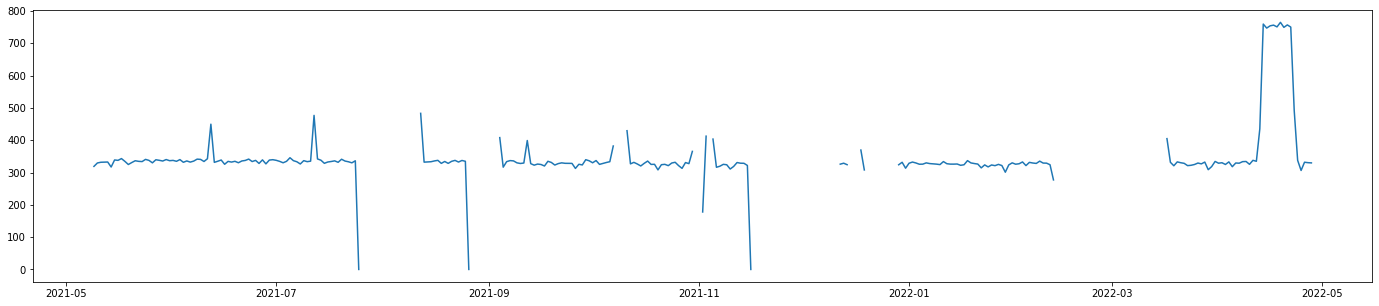

dc current 1


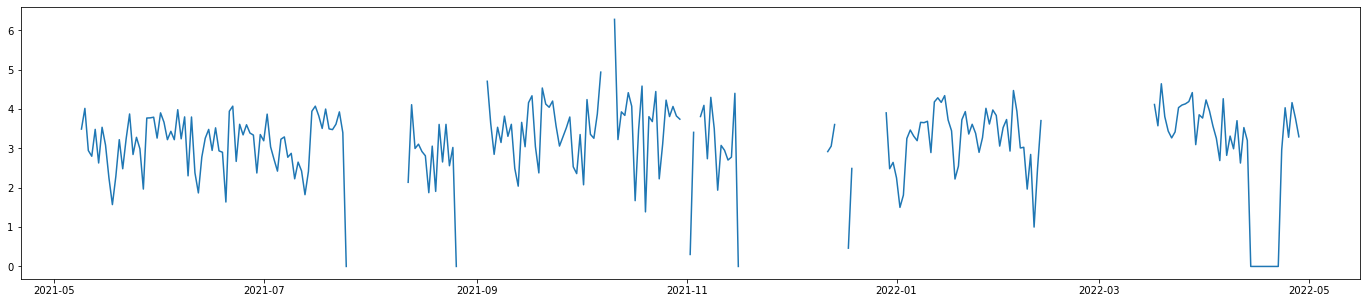

dc voltage 2


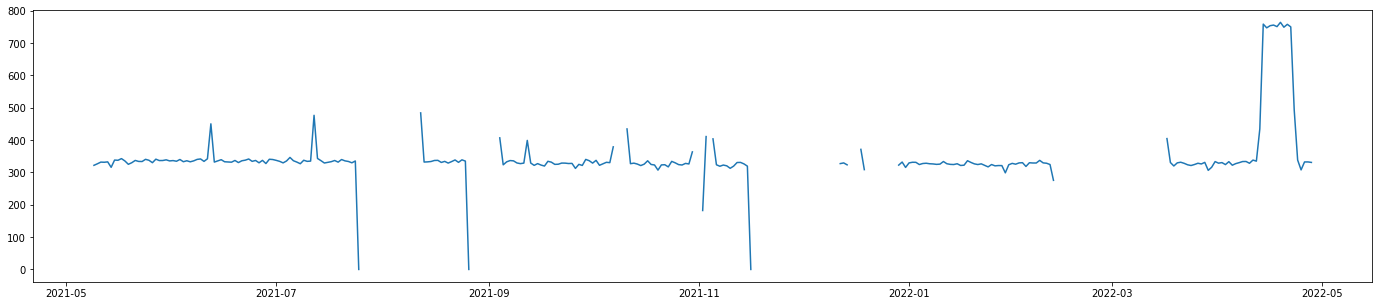

dc current 2


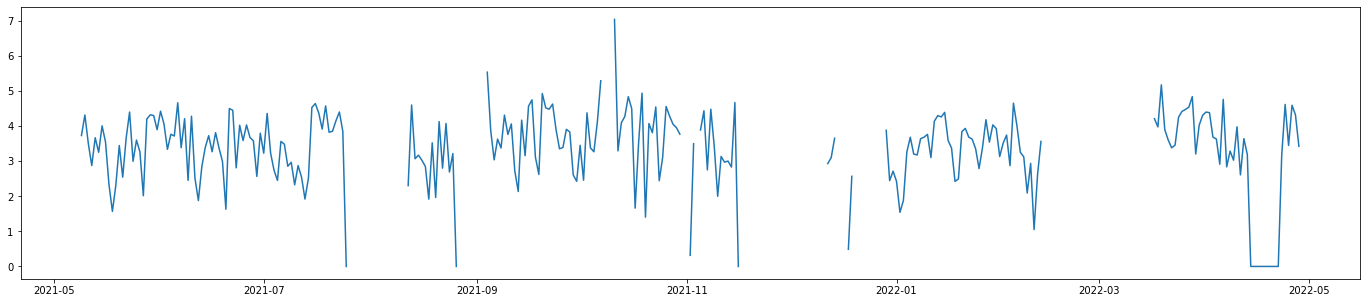

dc voltage 3


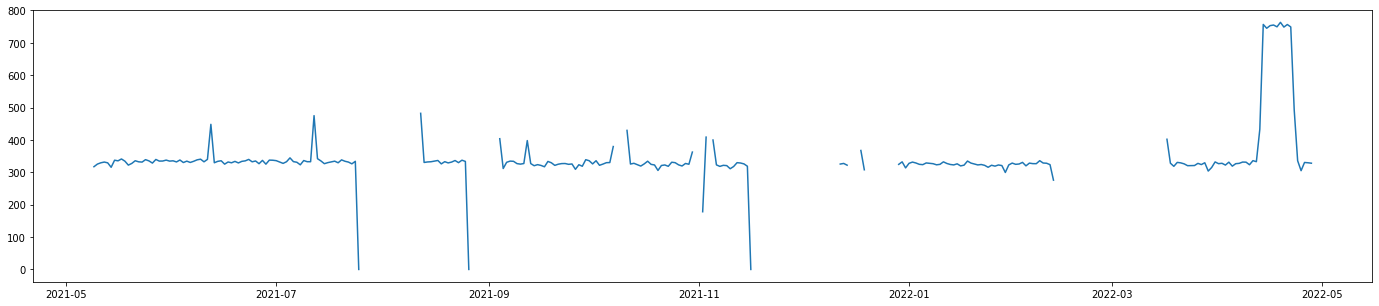

dc current 3


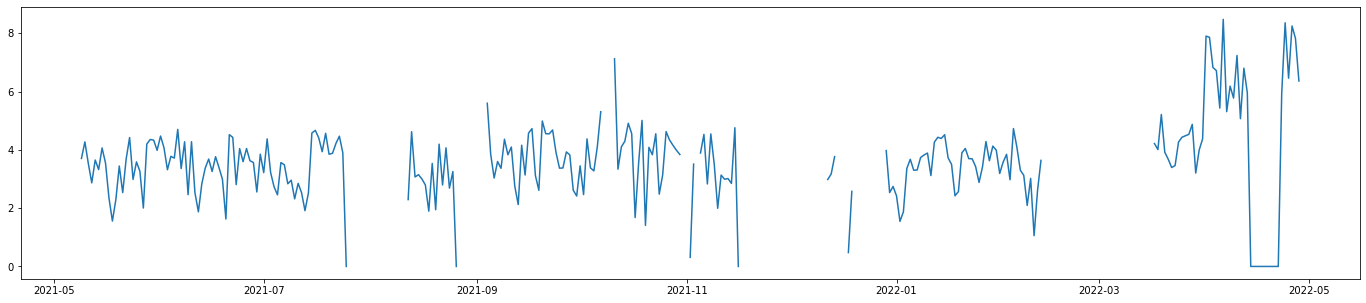

total dc power


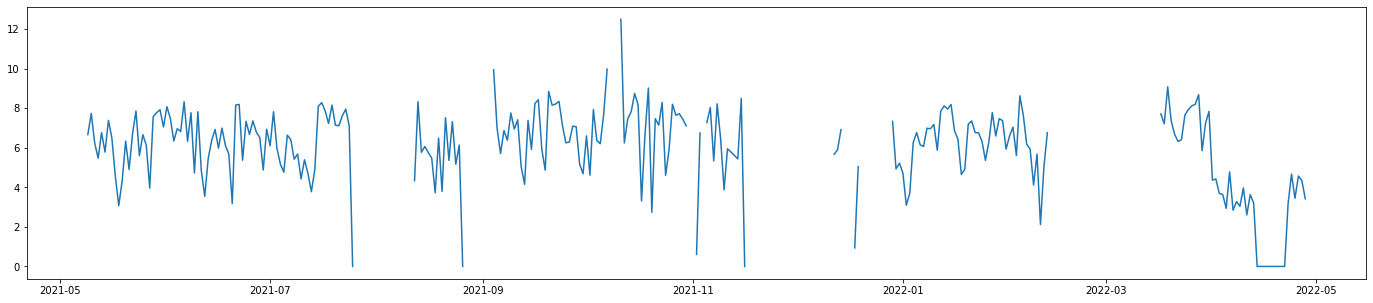

phase A voltage


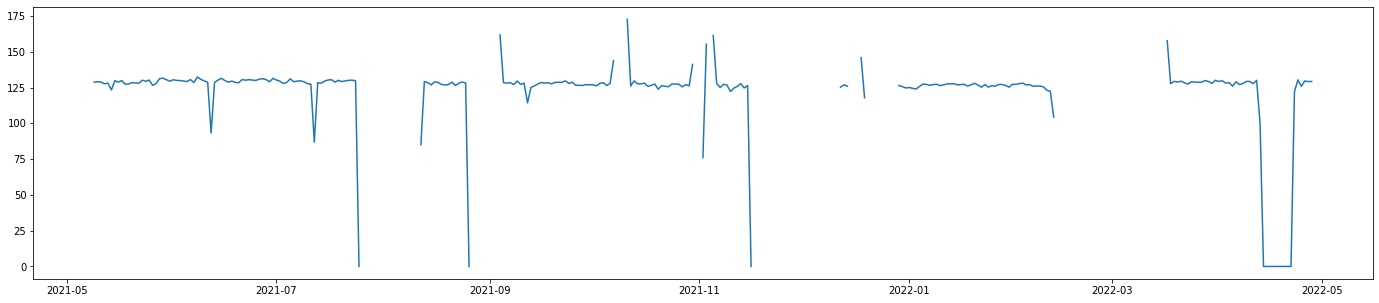

phase B voltage


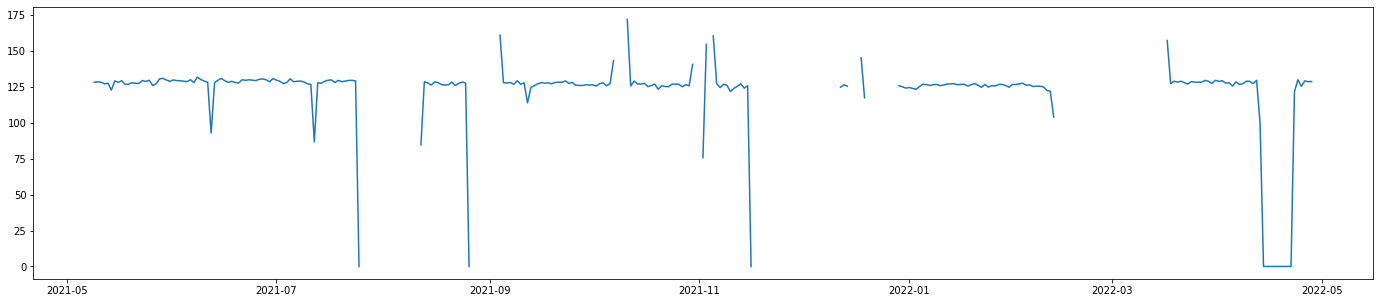

phase C voltage


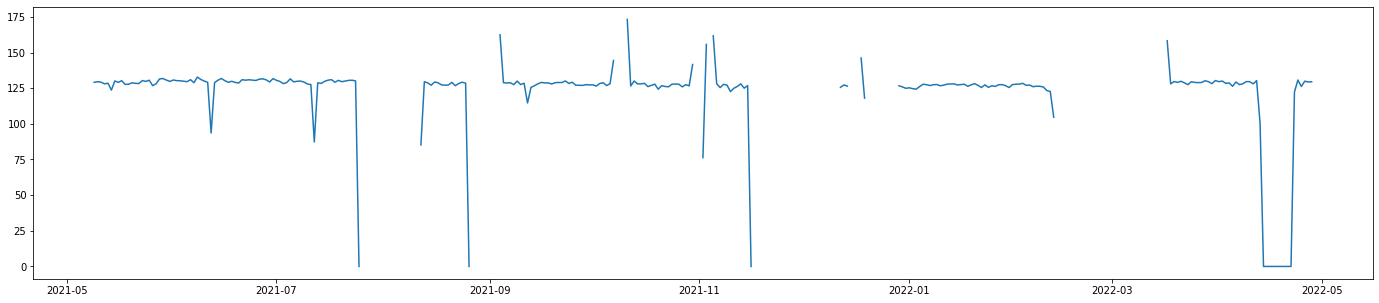

phase A current


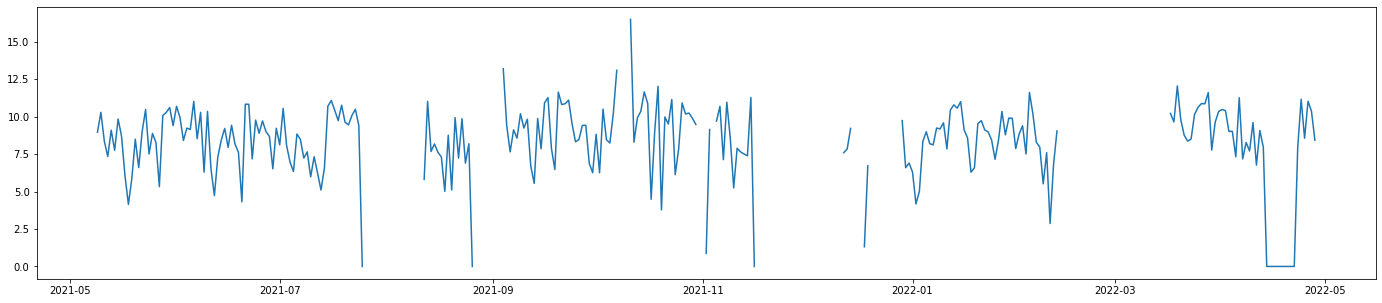

phase B current


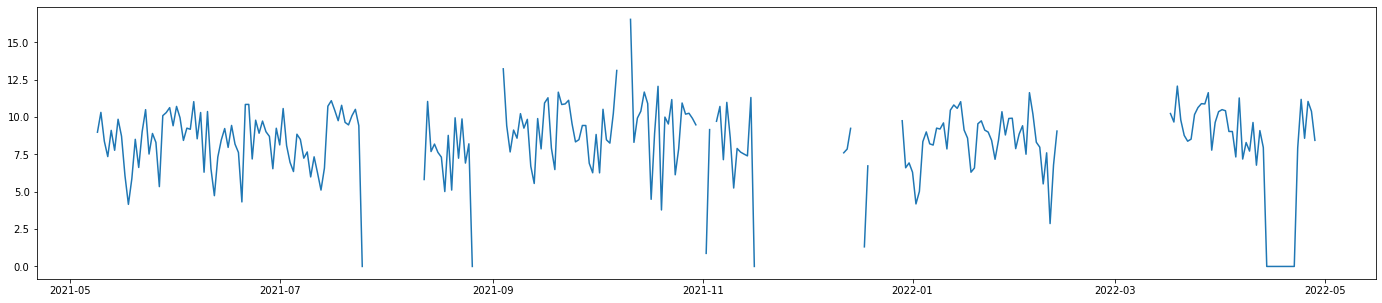

phase C current


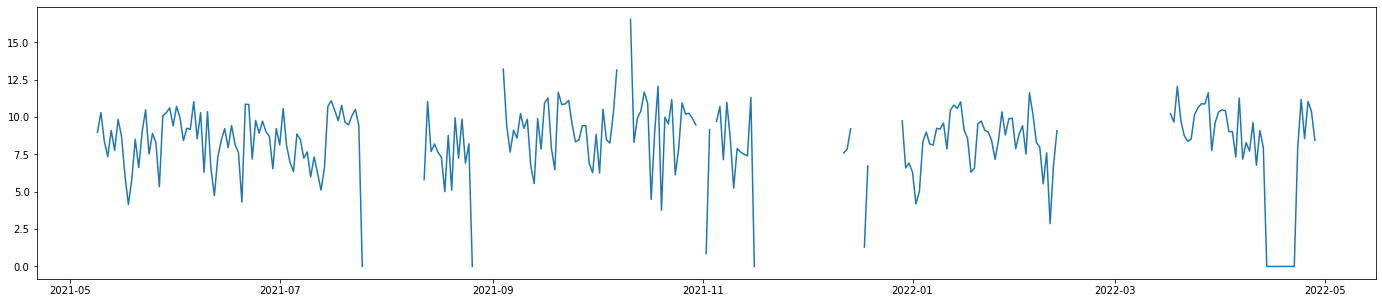

ring temperature


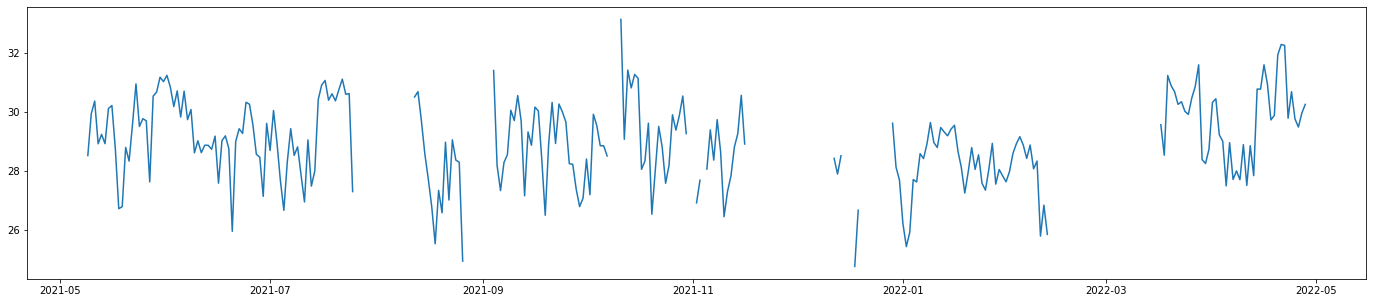

total active power


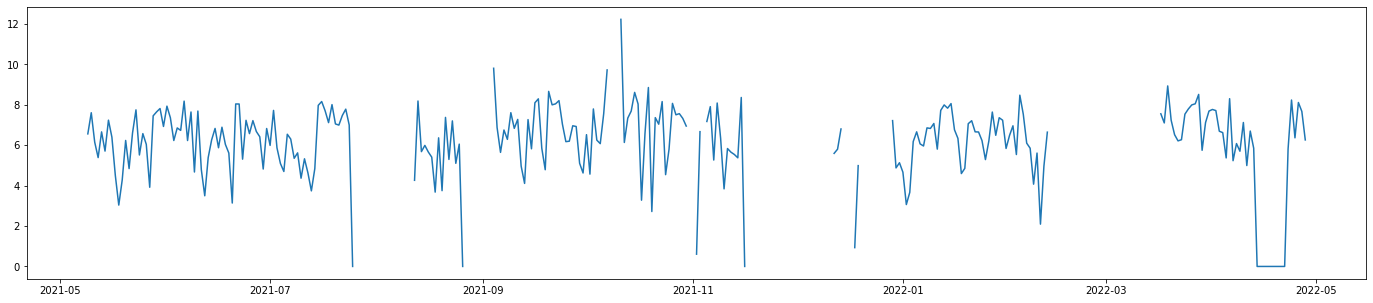

In [ ]:
cols = ['nominal power output','dc voltage 1','dc current 1','dc voltage 2','dc current 2','dc voltage 3',
       'dc current 3','total dc power','phase A voltage','phase B voltage','phase C voltage','phase A current',
       'phase B current','phase C current','ring temperature','total active power']

for i in cols[1:]:
    print(i)
    plt.figure(figsize=(24, 5))
    plt.plot(df_daily[i])
    plt.show()

#the data contains skipped date and time

dc voltage 1


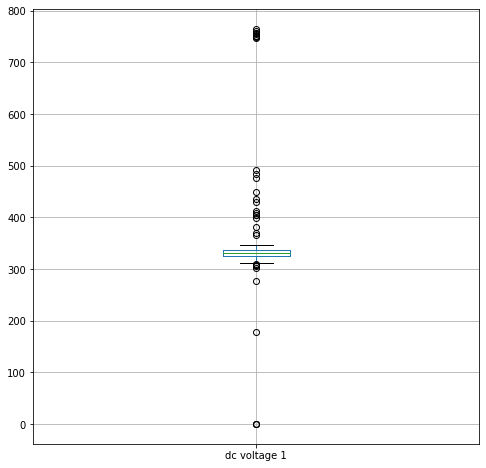

dc current 1


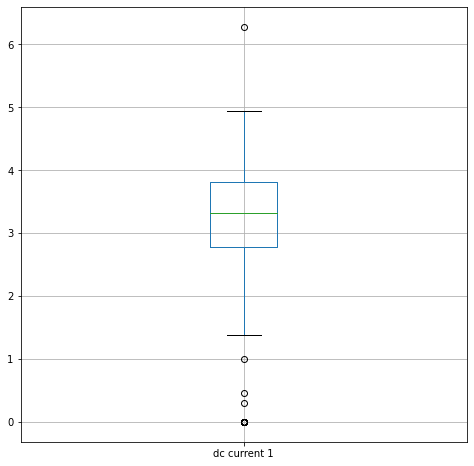

dc voltage 2


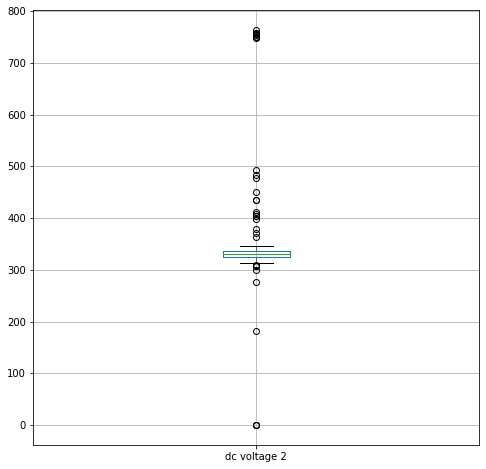

dc current 2


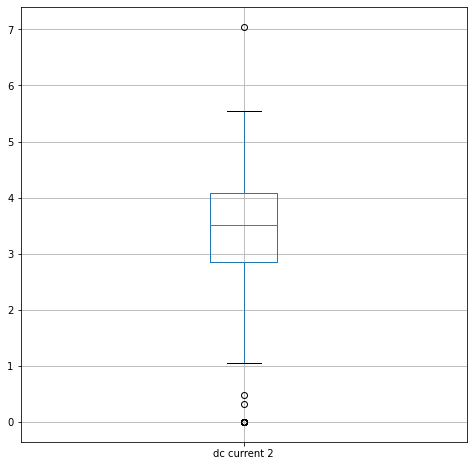

dc voltage 3


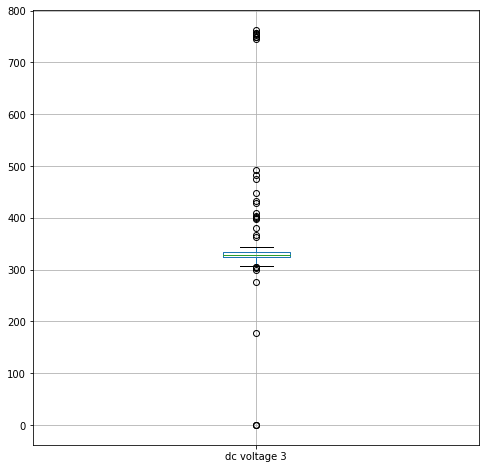

dc current 3


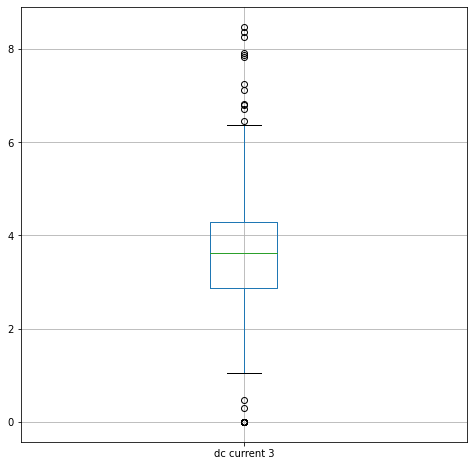

total dc power


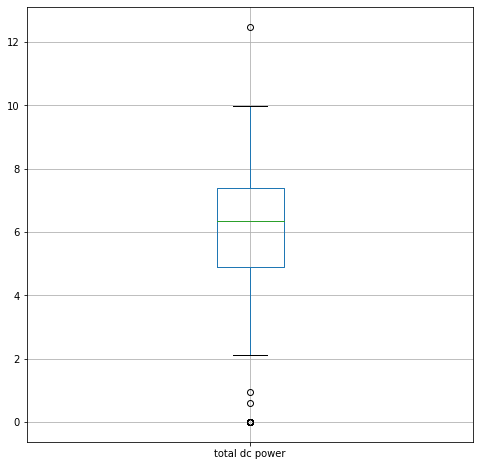

phase A voltage


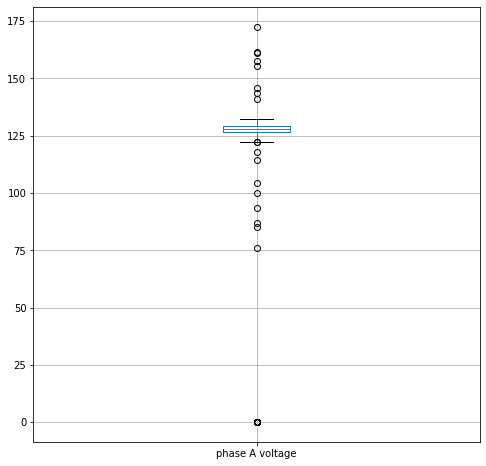

phase B voltage


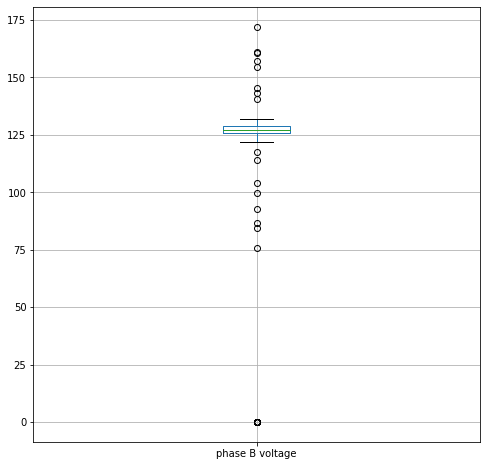

phase C voltage


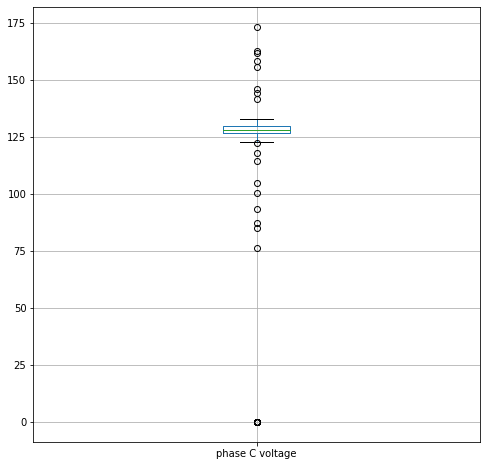

phase A current


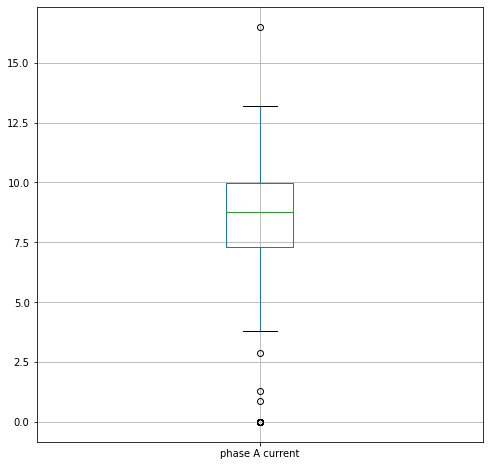

phase B current


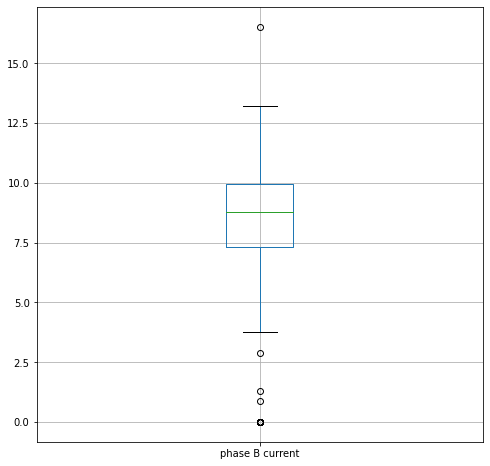

phase C current


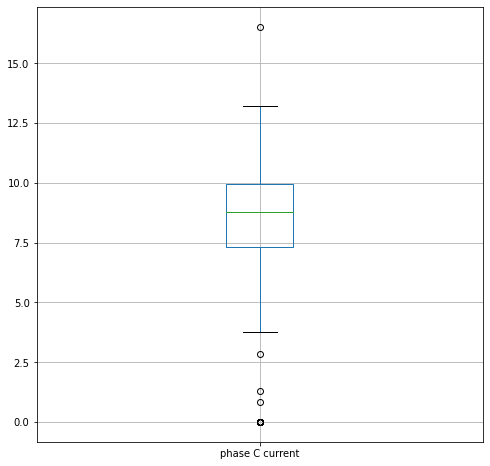

ring temperature


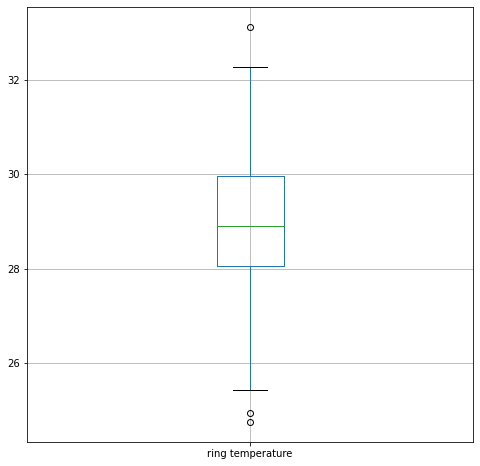

total active power


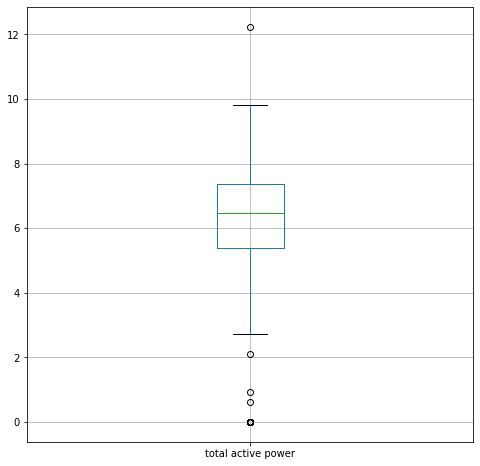

In [ ]:
cols = ['nominal power output','dc voltage 1','dc current 1','dc voltage 2','dc current 2','dc voltage 3',
       'dc current 3','total dc power','phase A voltage','phase B voltage','phase C voltage','phase A current',
       'phase B current','phase C current','ring temperature','total active power']

for i in cols[1:]:
    print(i)
    plt.figure(figsize=(8, 8))
    df_daily.boxplot(column=[i])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


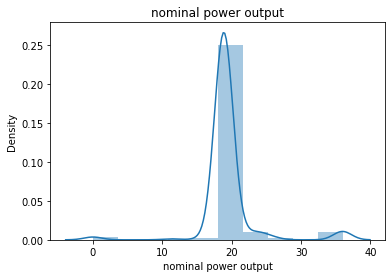

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


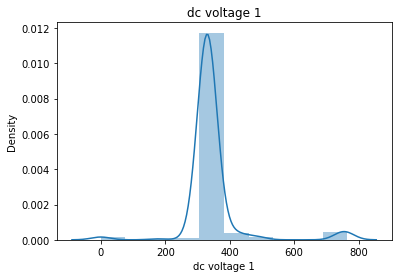

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


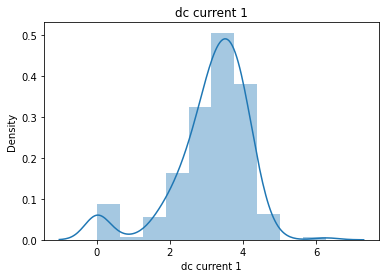

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


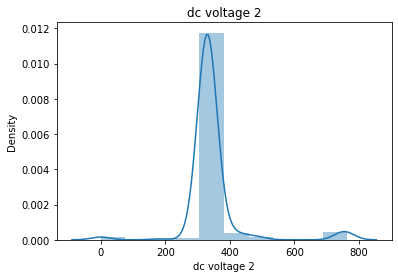

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


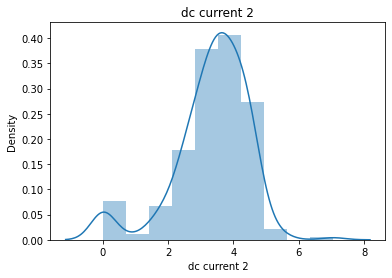

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


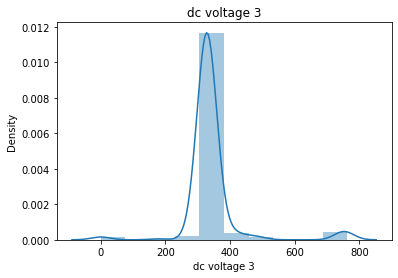

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


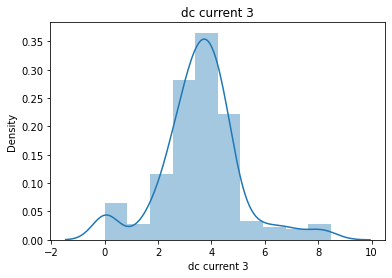

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


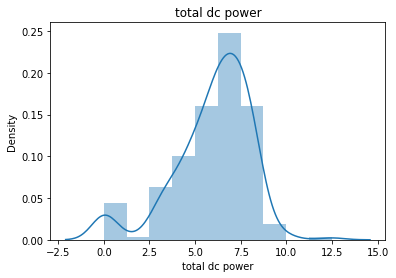

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


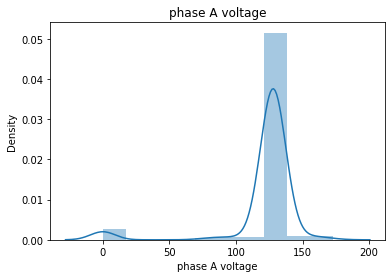

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


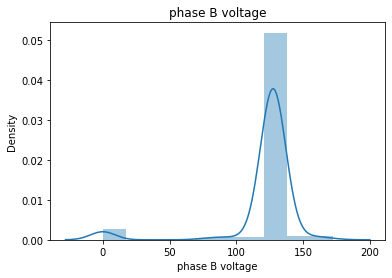

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


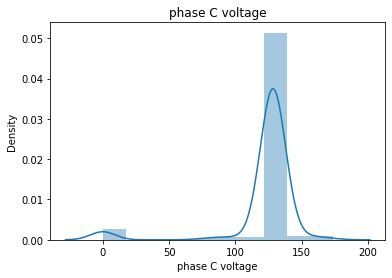

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


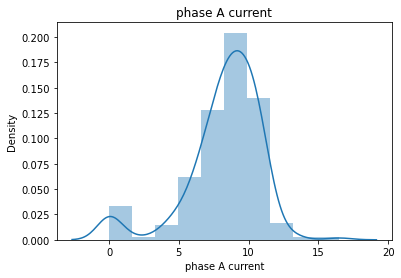

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


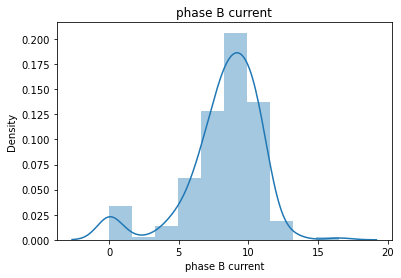

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


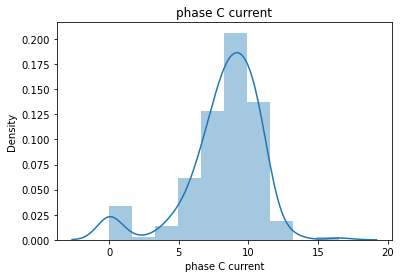

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


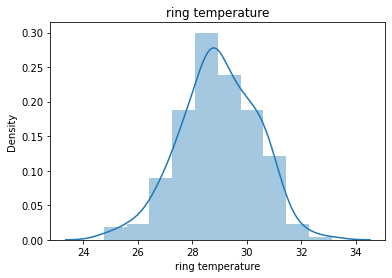

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


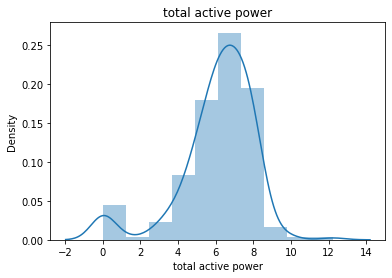

In [ ]:
col = ['nominal power output','dc voltage 1','dc current 1','dc voltage 2','dc current 2','dc voltage 3',
       'dc current 3','total dc power','phase A voltage','phase B voltage','phase C voltage','phase A current',
       'phase B current','phase C current','ring temperature','total active power']

for i in col:
  sns.distplot(df_daily[i], bins=10)
  plt.title(i)
  plt.show()

Interpolating the missing values using linear interpolation.

In [ ]:
# Imputing with cubic linear interpolation
df_daily= df_daily.interpolate(method='linear')

dc voltage 1


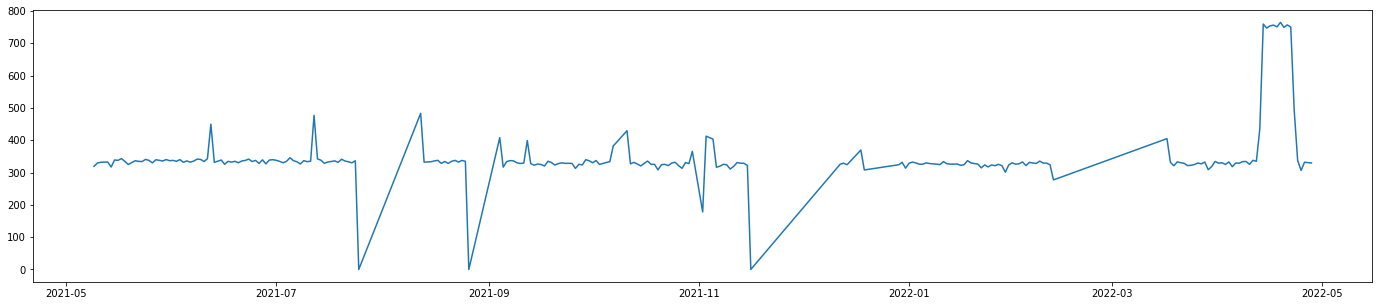

dc current 1


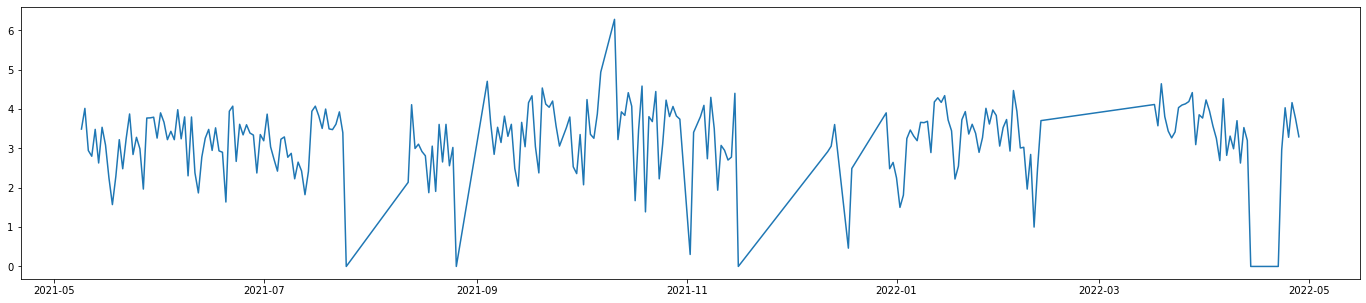

dc voltage 2


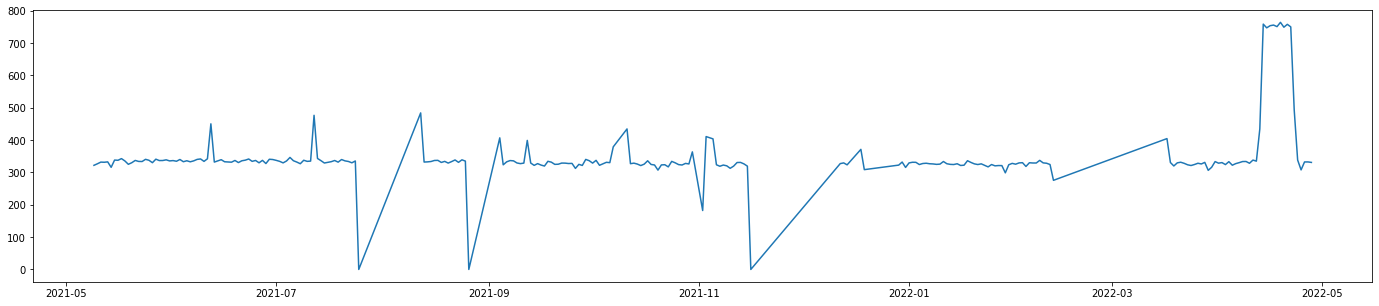

dc current 2


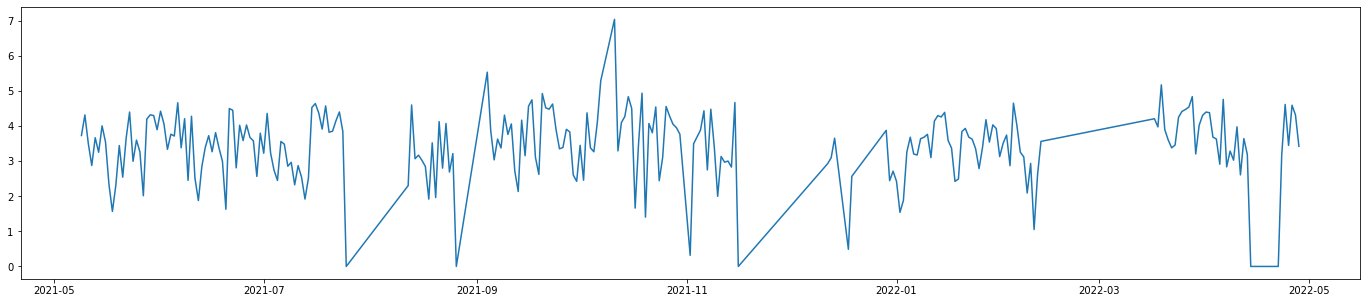

dc voltage 3


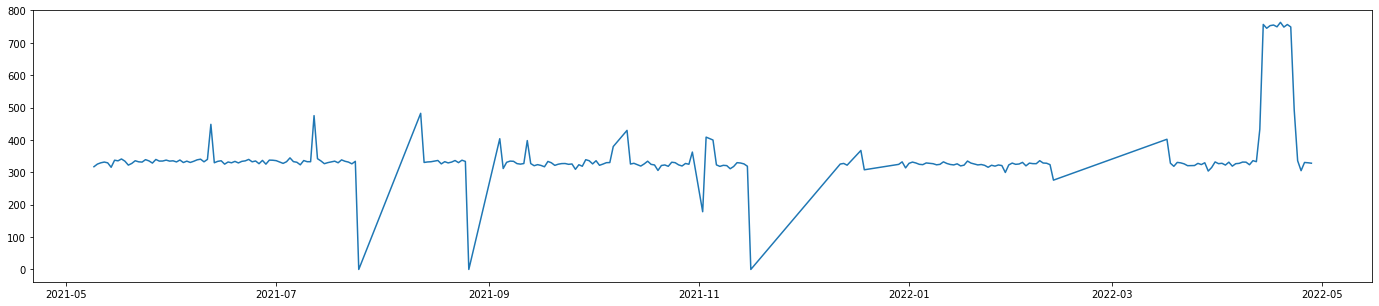

dc current 3


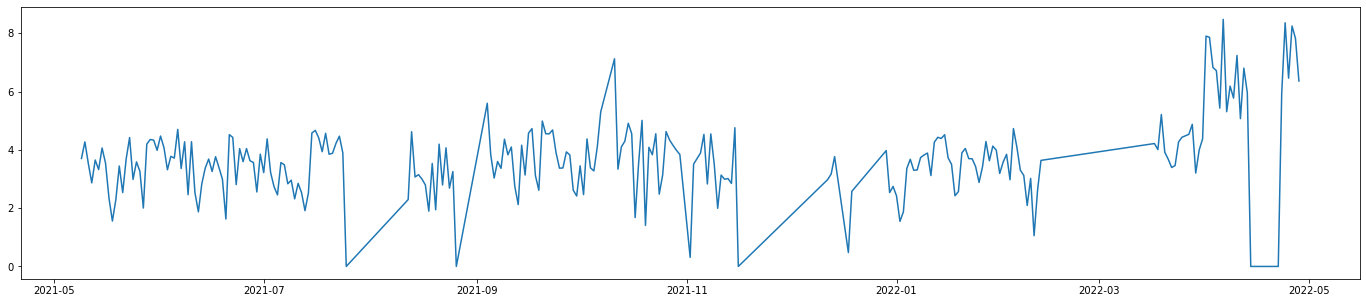

total dc power


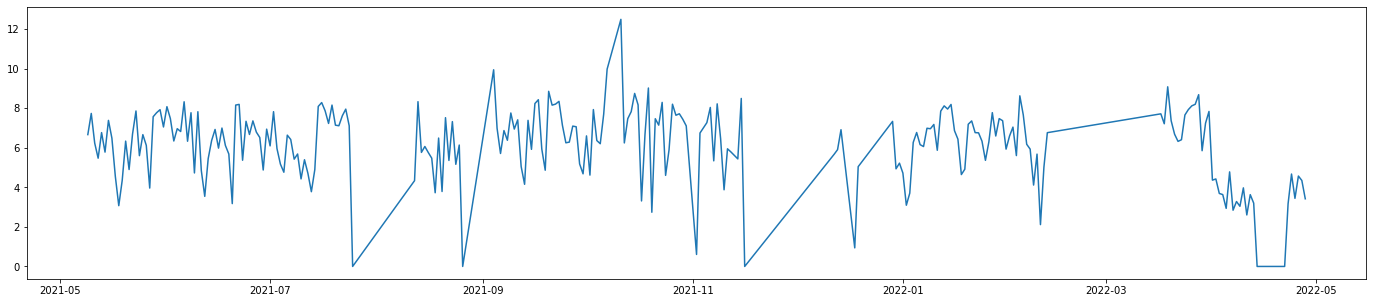

phase A voltage


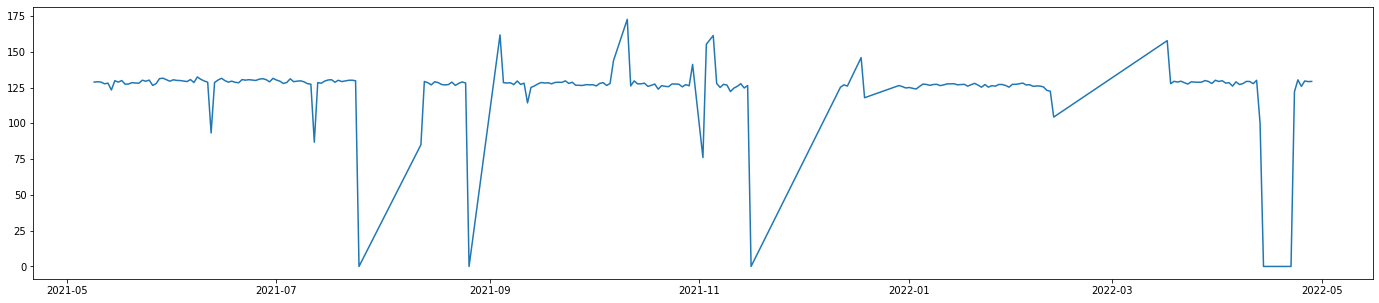

phase B voltage


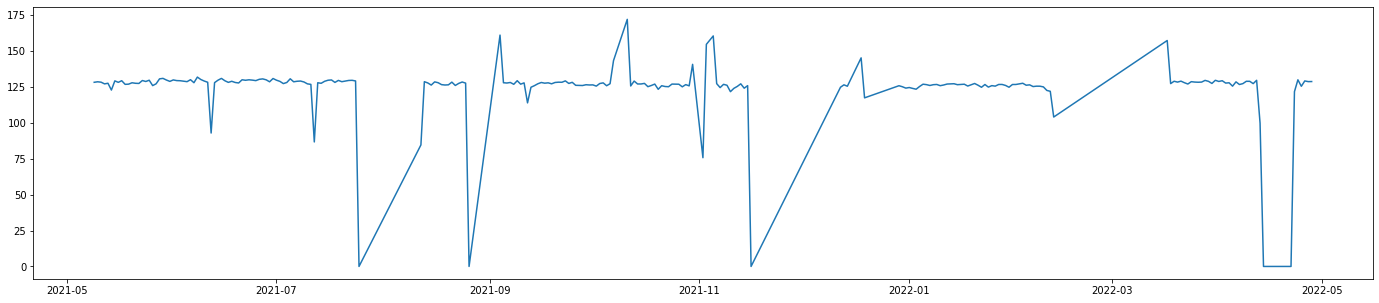

phase C voltage


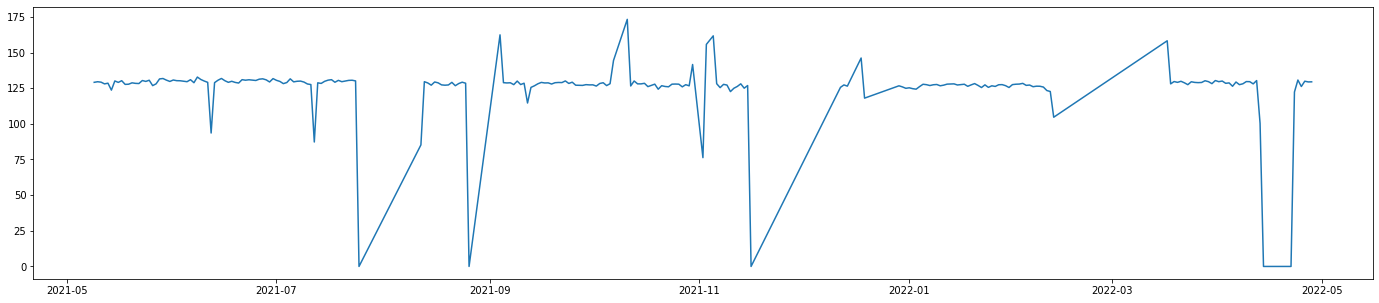

phase A current


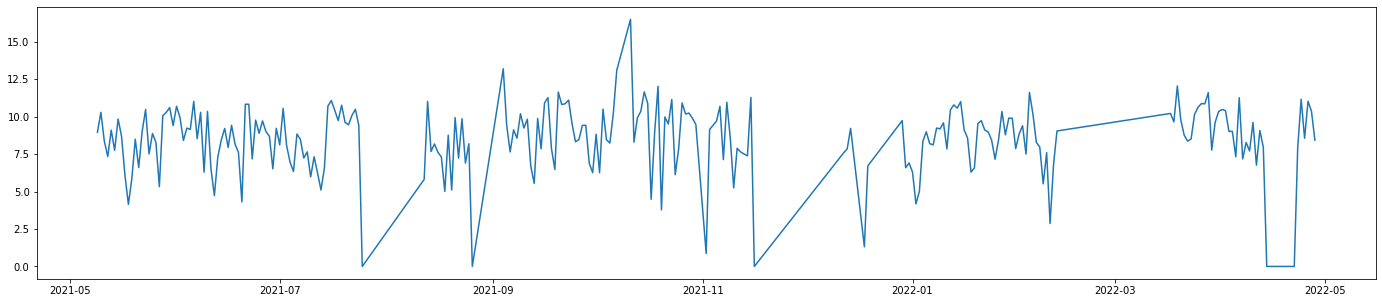

phase B current


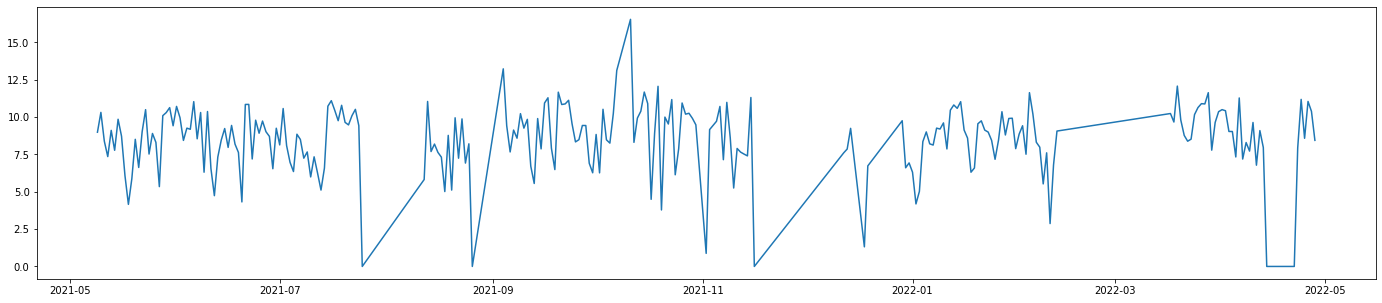

phase C current


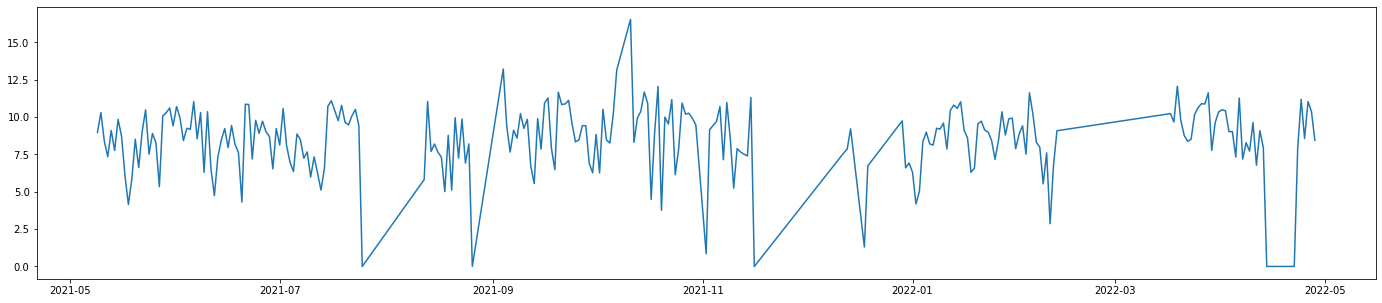

ring temperature


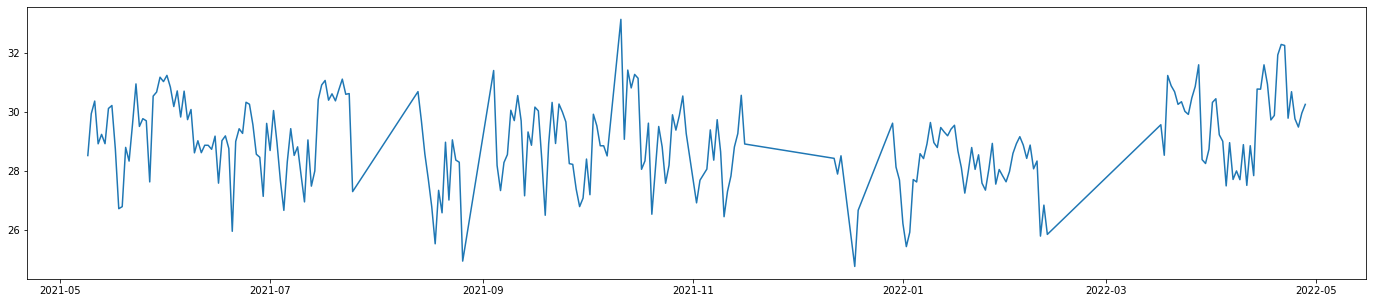

total active power


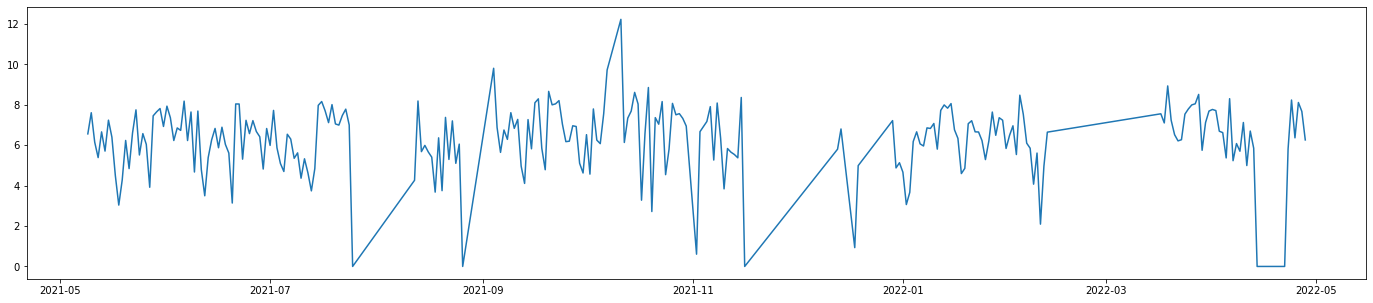

In [ ]:
cols = ['nominal power output','dc voltage 1','dc current 1','dc voltage 2','dc current 2','dc voltage 3',
       'dc current 3','total dc power','phase A voltage','phase B voltage','phase C voltage','phase A current',
       'phase B current','phase C current','ring temperature','total active power']

for i in cols[1:]:
    print(i)
    plt.figure(figsize=(24, 5))
    plt.plot(df_daily[i])
    plt.show()

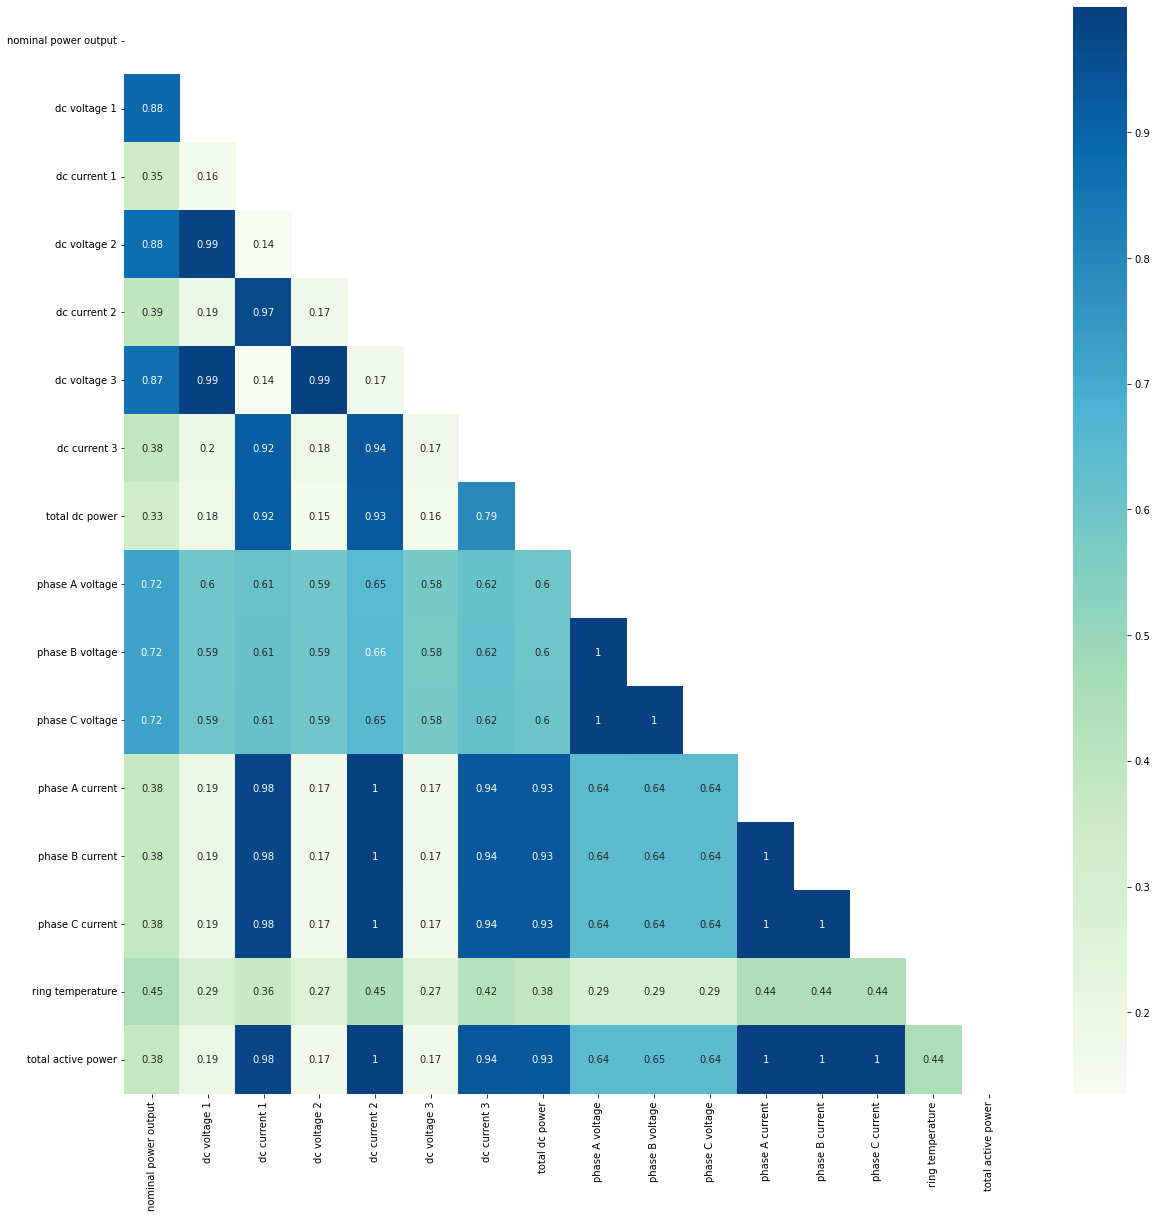

In [ ]:
plt.figure(figsize=(20,20))
corr=df_daily.corr(method='spearman')
matrix = np.triu(corr)
sns.heatmap(corr,cmap='GnBu',annot=True,mask=matrix)

In [ ]:
new_cols=['dc current 1','dc current 2','dc current 3','total dc power','phase A voltage','phase B voltage','phase C voltage','phase A current',
       'phase B current','phase C current','total active power']
df_daily=df_daily[new_cols]

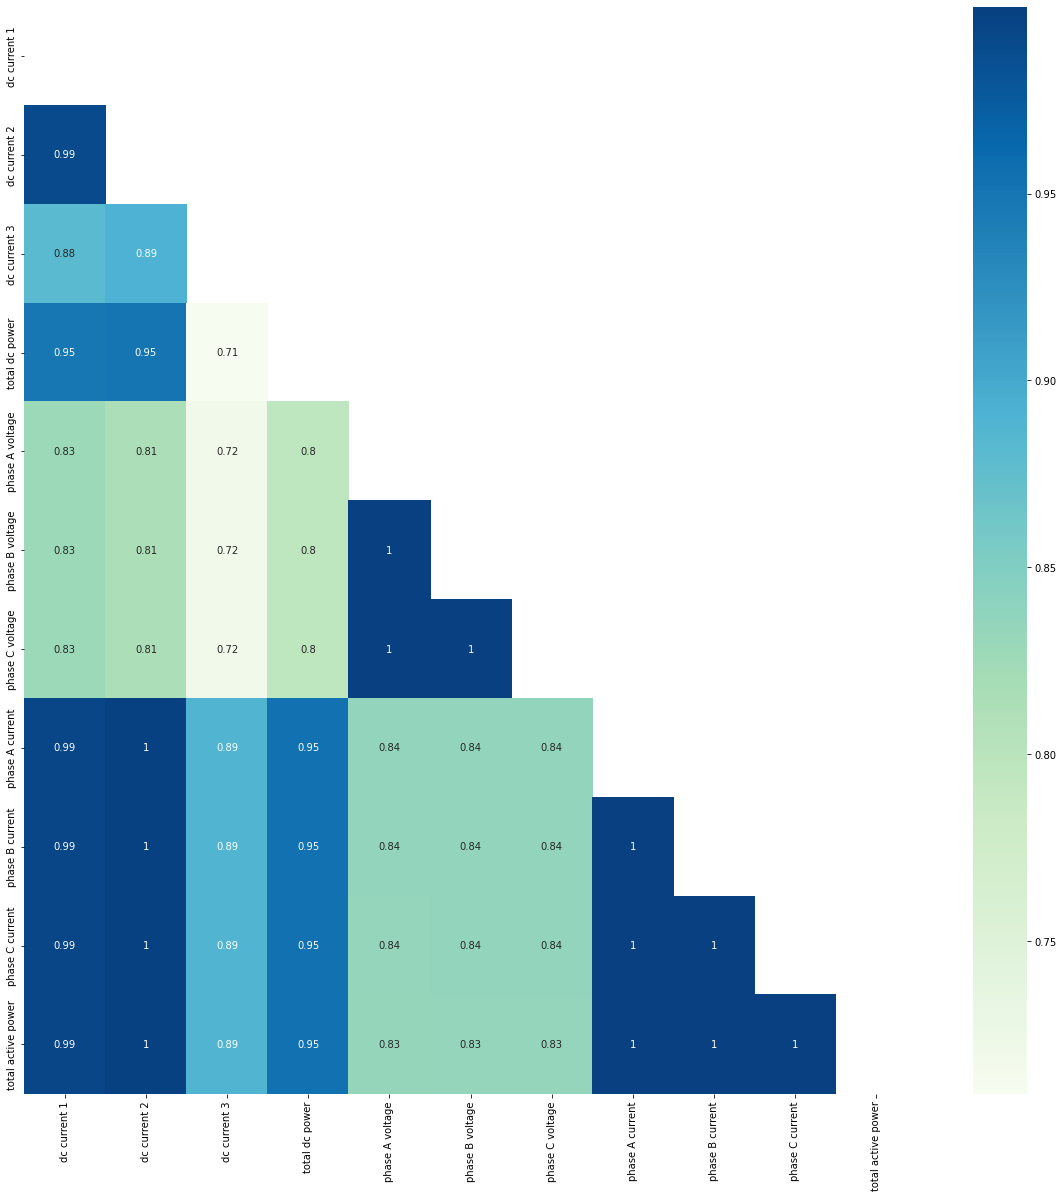

In [ ]:
plt.figure(figsize=(20,20))
corr=df_daily.corr()
matrix = np.triu(corr)
sns.heatmap(corr,cmap='GnBu',annot=True,mask=matrix)

Univariate Time Series Modelling - ARIMA
*   Train Test Split
*   Seasonal and trending effect checking using decompositional plot
*   Stationarity checking using ACF, PACF and ADF Test
*   ARIMA modelling





In [ ]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

!pip install pmdarima --quiet
import pmdarima as pm

In [ ]:
df_arima = df_daily.drop(['dc current 1','dc current 2','dc current 3','total dc power','phase A voltage','phase B voltage','phase C voltage','phase A current',
       'phase B current','phase C current'],axis=1)

df_arima

total active power
date_time                     
2021-05-09            6.564205
2021-05-10            7.611170
2021-05-11            6.156351
2021-05-12            5.389962
2021-05-13            6.662997
...                        ...
2022-04-24            8.240557
2022-04-25            6.368053
2022-04-26            8.118066
2022-04-27            7.675454
2022-04-28            6.264765

[355 rows x 1 columns]

In [ ]:
test_size = 110

df_arima_train = df_arima[:-test_size]
df_arima_test = df_arima[-test_size:]

In [ ]:
stat, p = stats.normaltest(df_arima_train)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=8.079, p=0.018
Data does not look Gaussian (reject H0)


Kurtosis of normal distribution: [0.14094436]
Skewness of normal distribution: [-0.43789699]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


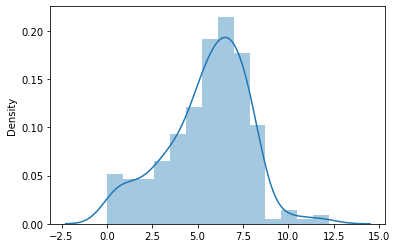

In [ ]:
sns.distplot(df_arima_train);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df_arima_train)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df_arima_train)))

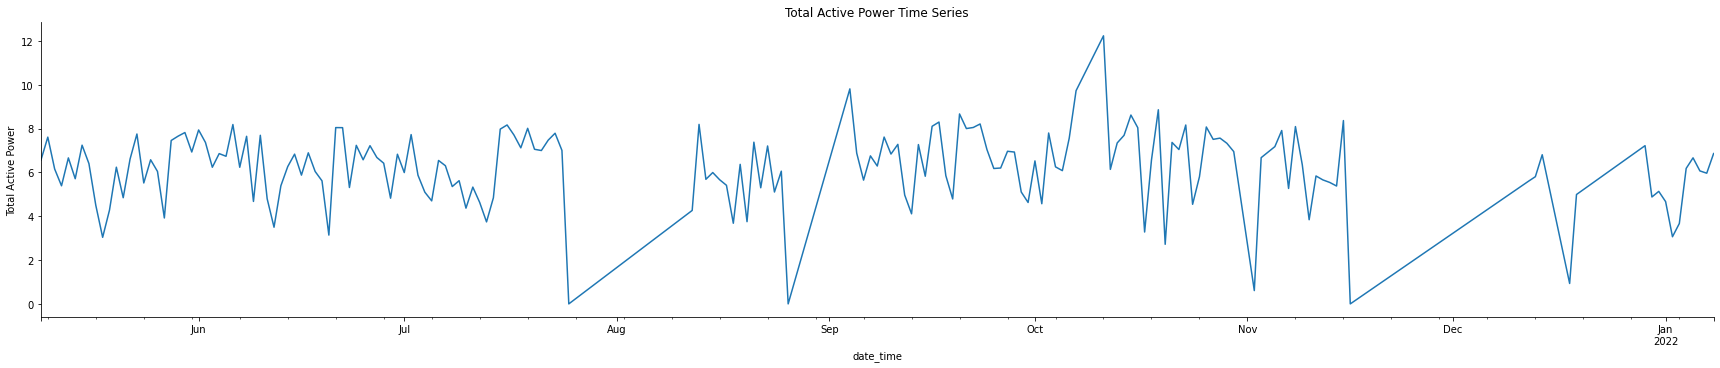

In [ ]:
df_arima_train.plot(figsize=(24,5))
plt.ylabel('Total Active Power')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Total Active Power Time Series')
sns.despine(top=True)
plt.show();

In [ ]:
decomp = seasonal_decompose(df_arima_train['total active power'])

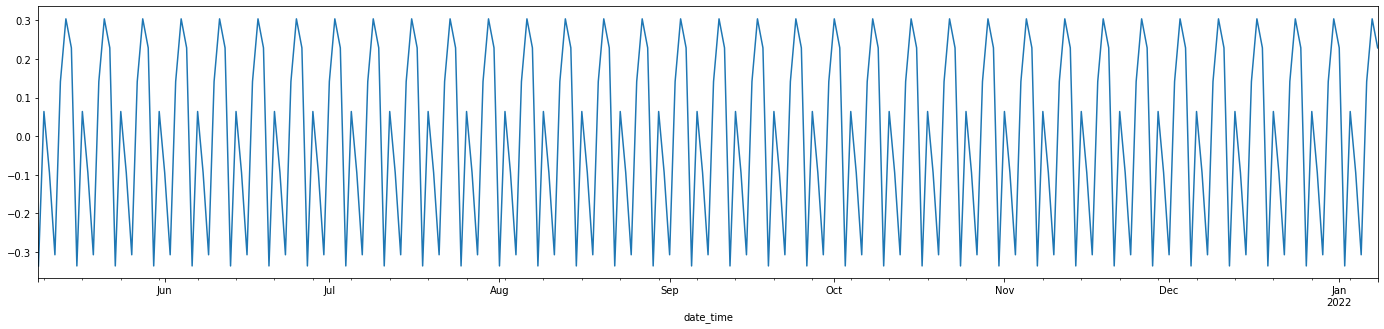

In [ ]:
plt.figure(figsize=(24,5))
decomp.seasonal.plot()
#the dataset is seasonal

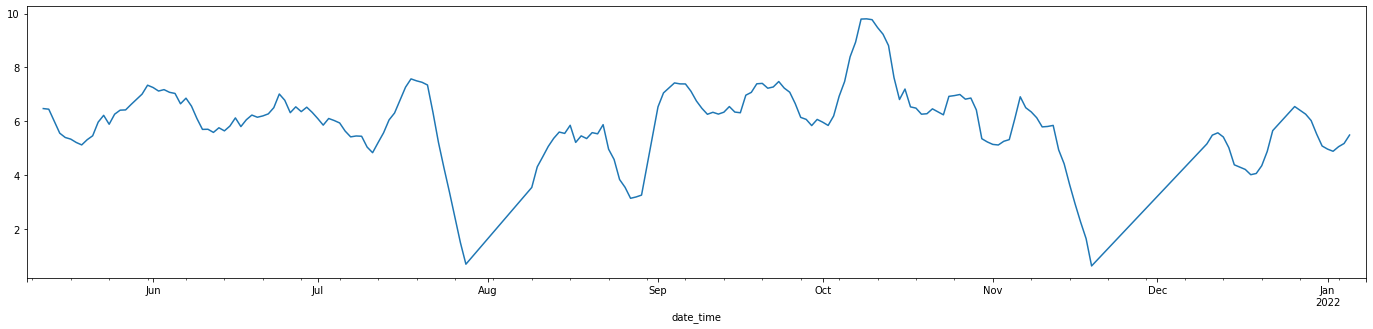

In [ ]:
plt.figure(figsize=(24,5))
decomp.trend.plot()
#dataset shows no clear trending

In [ ]:
outlier = df_arima_train.loc[df_arima_train['total active power'] == 0]
outlier

total active power
date_time                     
2021-07-25                 0.0
2021-08-26                 0.0
2021-11-16                 0.0

In [ ]:
pct_outlier = (len(outlier)/len(df_arima_train))*100
print('Outlier data percentage for'+' '+i+' '+'is', round(pct_outlier,2),'%')

Outlier data percentage for total active power is 1.22 %


In [ ]:
df_arima_train = df_arima_train[df_arima_train['total active power'] >0 ]

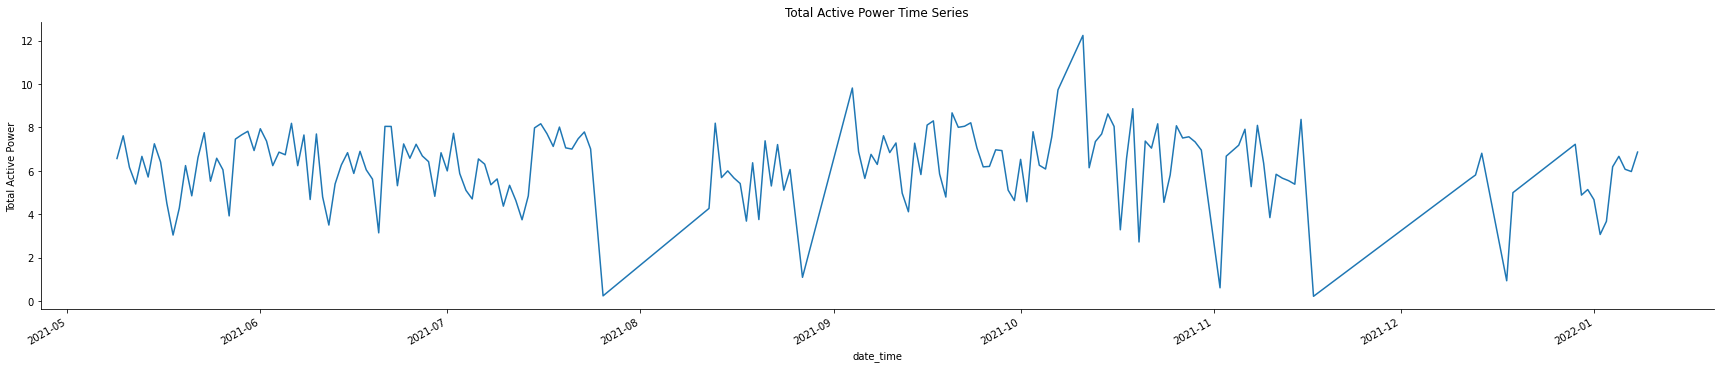

In [ ]:
df_arima_train.plot(figsize=(24,5))
plt.ylabel('Total Active Power')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Total Active Power Time Series')
sns.despine(top=True)
plt.show();

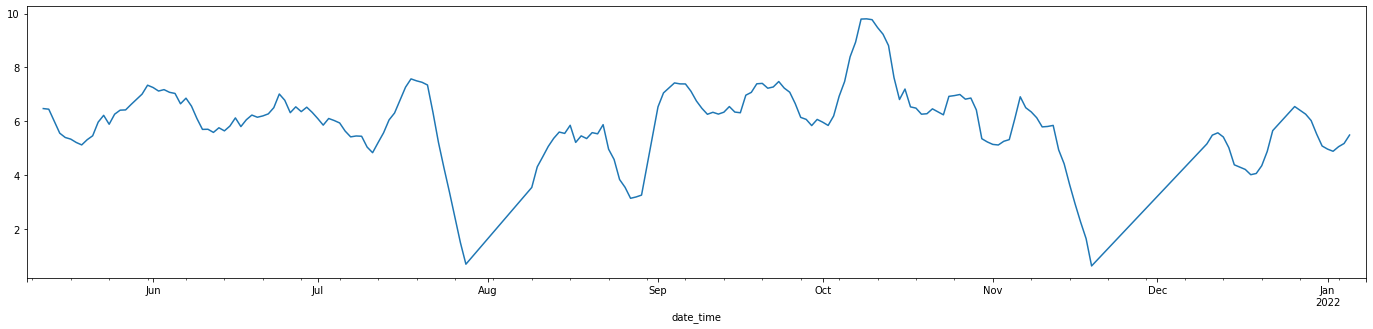

In [ ]:
plt.figure(figsize=(24,5))
decomp.trend.plot()
#dataset shows no clear trending

In [ ]:
lag_acf = acf(df_arima_train['total active power'], nlags=30)
lag_acf

array([1.        , 0.66676989, 0.54596775, 0.44852733, 0.37654906,
       0.2985423 , 0.27014172, 0.25149468, 0.22984144, 0.16262661,
       0.1064217 , 0.10763169, 0.11671099, 0.11275426, 0.10141427,
       0.16917715, 0.21125602, 0.16472881, 0.14601079, 0.120738  ,
       0.13159098, 0.10554748, 0.06031154, 0.08211297, 0.07650975,
       0.04218243, 0.01514004, 0.05570732, 0.0644163 , 0.0644743 ,
       0.03915064])

In [ ]:
lag_pacf = pacf(df_arima_train['total active power'], nlags=30)
lag_pacf

array([ 1.        ,  0.66953657,  0.18530798,  0.05593031,  0.03236582,
       -0.01941207,  0.0513527 ,  0.04918261,  0.0223906 , -0.07805845,
       -0.06156185,  0.05764493,  0.06381374,  0.02095994, -0.01432212,
        0.14556465,  0.10745247, -0.08112634, -0.02582072, -0.04417722,
        0.05634282, -0.01246887, -0.09256989,  0.04475862,  0.00545459,
       -0.01129971, -0.02039322,  0.08604299,  0.02007753,  0.01493694,
       -0.04670583])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


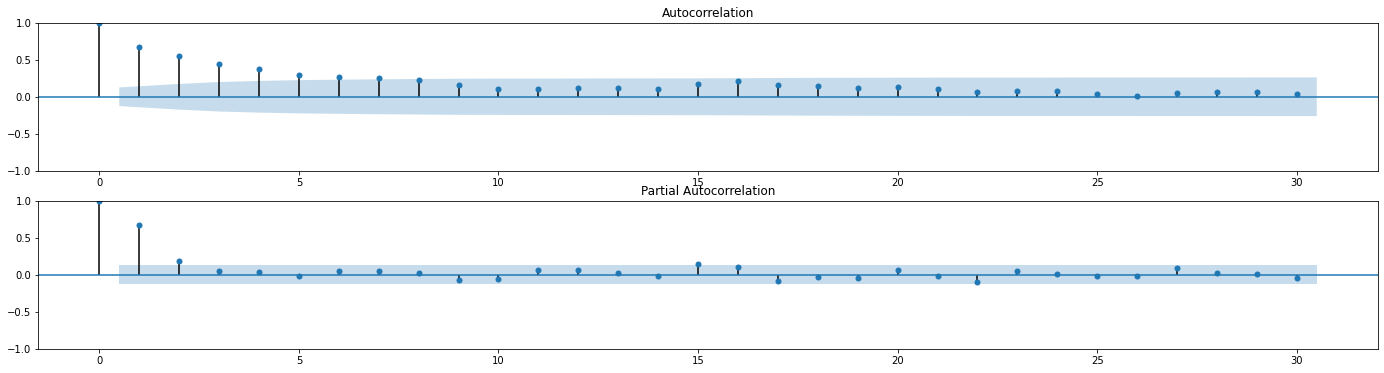

In [ ]:
fig = plt.figure(figsize=(24,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_arima_train,lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_arima_train,lags=30,ax=ax2)
#the ACF shows decaying pattern suggesting the dataset has trends
#slight significant values detected at ACF and PACF, thus the modelling will start from using p=2 q=1

In [ ]:
X = df_arima_train['total active power'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0]) #the more negative, the more likely to reject null hypothesis(not stationary)
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
#large negative value of ADF statistic implies the data is stationary

ADF Statistic: -5.236306
p-value: 0.000007
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_1 = SARIMAX(df_arima_train,order=(2,0,1))
result_1 = model_1.fit()
print(result_1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     total active power   No. Observations:                  242
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -464.617
Date:                Tue, 09 Aug 2022   AIC                            937.234
Time:                        22:49:46   BIC                            951.190
Sample:                             0   HQIC                           942.856
                                - 242                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5024      0.086     17.472      0.000       1.334       1.671
ar.L2         -0.5034      0.085     -5.927      0.000      -0.670      -0.337
ma.L1         -0.8870      0.059    -14.997      0.0

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_2 = SARIMAX(df_arima_train,order=(2,0,2))
result_2 = model_2.fit()
print(result_2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     total active power   No. Observations:                  242
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -461.532
Date:                Tue, 09 Aug 2022   AIC                            933.065
Time:                        22:49:46   BIC                            950.509
Sample:                             0   HQIC                           940.092
                                - 242                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8300      0.000   1.43e+04      0.000       1.830       1.830
ar.L2         -0.8300      0.000  -6121.244      0.000      -0.830      -0.830
ma.L1         -1.2964      0.106    -12.191      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
#counter check
autoARIMA_model = pm.auto_arima(df_arima_train['total active power'], start_p=1, start_q=1,
                             start_P=1, start_Q=1,test='adf', max_p=3, max_q=3, m=7, #7 days in a week
                             seasonal=True, #set to seasonal
                             d=None, D=None, #order of the seasonal differencing (no need differencing due to stationary)
                             trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, 
                             stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=928.664, Time=1.38 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=1072.094, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=933.253, Time=0.29 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=985.698, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1557.837, Time=0.01 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=926.324, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=924.819, Time=0.35 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=926.418, Time=1.06 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=989.234, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=931.961, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=926.797, Time=0.88 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=926.800, Time=0.61 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=958.308, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=925.685, Time=0.41 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=928

In [ ]:
print(autoARIMA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -458.409
Date:                Tue, 09 Aug 2022   AIC                            924.819
Time:                        22:49:53   BIC                            938.774
Sample:                             0   HQIC                           930.440
                                - 242                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0120      0.385      2.630      0.009       0.258       1.766
ar.L1          0.8207      0.063     12.993      0.000       0.697       0.944
ma.L1         -0.2913      0.085     -3.415      0.0

In [ ]:
len(df_arima_train)

242

In [ ]:
#calculate residual
train_predict=pd.DataFrame(autoARIMA_model.predict(start=0,end=len(df_arima_train)-1))
residual=train_predict.values-df_arima_train['total active power'].values
residual

array([[-0.1954938 , -1.24245911,  0.21235991, ...,  0.29960229,
         0.40429089, -0.49216373],
       [-0.325636  , -1.37260131,  0.08221771, ...,  0.16946009,
         0.2741487 , -0.62230593],
       [-0.43243936, -1.47940468, -0.02458566, ...,  0.06265672,
         0.16734533, -0.7291093 ],
       ...,
       [-0.73925531, -1.78622063, -0.3314016 , ..., -0.24415923,
        -0.13947062, -1.03592524],
       [-0.77188296, -1.81884828, -0.36402926, ..., -0.27678688,
        -0.17209827, -1.0685529 ],
       [-0.79865939, -1.84562471, -0.39080568, ..., -0.30356331,
        -0.1988747 , -1.09532932]])

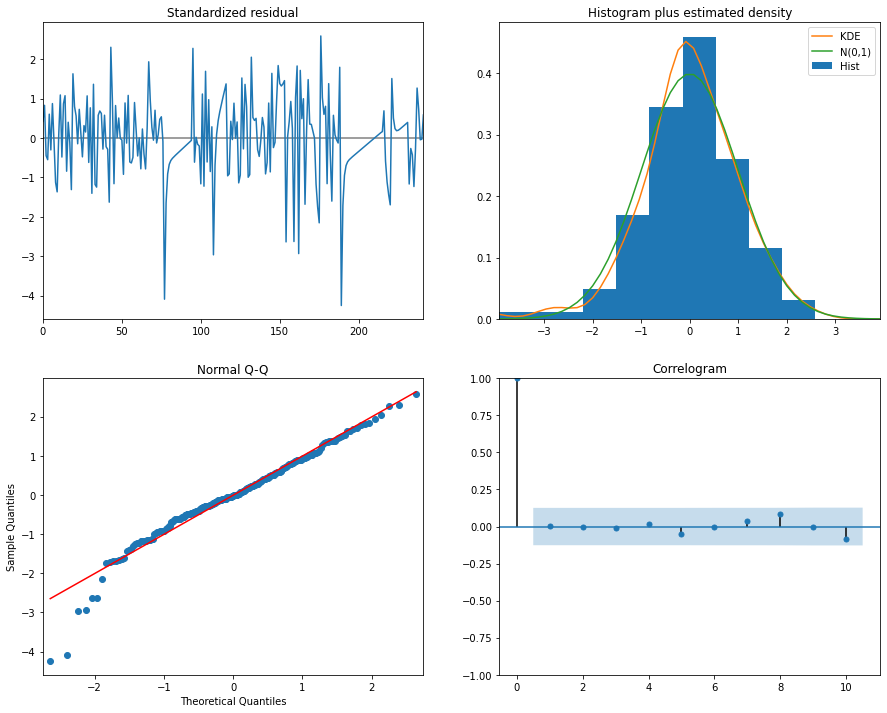

In [ ]:
autoARIMA_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
# Obtain predicted values
predictions = pd.DataFrame(autoARIMA_model.predict(n_periods=110,index=df_arima_test.index))

In [ ]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt

print('MAE = ' + str(mae(df_arima_test, predictions)))
print('RMSE = ' + str(sqrt(mean_squared_error(df_arima_test, predictions))))

MAE = 1.6856330797672832
RMSE = 2.17354353779265


Multivariate Time Series Modelling - MLP

* Train Test Split
* Transform the dataset into a supervised dataset (y = total_active_power, X = others)
* MLP modelling

In [ ]:
df_daily.head()

dc current 1  dc current 2  dc current 3  total dc power  \
date_time                                                              
2021-05-09      3.492019      3.734143      3.704997        6.664120   
2021-05-10      4.018188      4.319512      4.273171        7.734564   
2021-05-11      2.946895      3.502512      3.531263        6.236176   
2021-05-12      2.801324      2.877143      2.867735        5.471850   
2021-05-13      3.484497      3.670880      3.651047        6.765559   

            phase A voltage  phase B voltage  phase C voltage  \
date_time                                                       
2021-05-09       128.771409       128.213185       129.109924   
2021-05-10       129.049756       128.563902       129.518815   
2021-05-11       128.763712       128.291137       129.215422   
2021-05-12       127.578537       127.109477       128.009895   
2021-05-13       128.046648       127.537151       128.495042   

            phase A current  phase B current  phase C current  \
date_time                                                       
2021-05-09         8.967523         8.983484         8.966343   
2021-05-10        10.292892        10.310801        10.299512   
2021-05-11         8.369225         8.382066         8.376762   
2021-05-12         7.341254         7.352125         7.342439   
2021-05-13         9.101047         9.106844         9.102654   

            total active power  
date_time                       
2021-05-09            6.564205  
2021-05-10            7.611170  
2021-05-11            6.156351  
2021-05-12            5.389962  
2021-05-13            6.662997

In [ ]:
df_daily.tail()

dc current 1  dc current 2  dc current 3  total dc power  \
date_time                                                              
2022-04-24      4.034029      4.619833      8.361193        4.670842   
2022-04-25      3.282915      3.451883      6.459371        3.442259   
2022-04-26      4.164480      4.596999      8.249887        4.569016   
2022-04-27      3.767547      4.322238      7.825679        4.345448   
2022-04-28      3.296314      3.425243      6.361991        3.418915   

            phase A voltage  phase B voltage  phase C voltage  \
date_time                                                       
2022-04-24       130.342797       129.939875       130.707655   
2022-04-25       125.810251       125.440725       126.177057   
2022-04-26       129.560851       129.157781       129.887090   
2022-04-27       129.119388       128.682974       129.382974   
2022-04-28       129.249722       128.735118       129.454520   

            phase A current  phase B current  phase C current  \
date_time                                                       
2022-04-24        11.168406        11.180793        11.181141   
2022-04-25         8.562064         8.577057         8.562692   
2022-04-26        11.029030        11.043405        11.039567   
2022-04-27        10.370327        10.379847        10.359903   
2022-04-28         8.429346         8.439082         8.435535   

            total active power  
date_time                       
2022-04-24            8.240557  
2022-04-25            6.368053  
2022-04-26            8.118066  
2022-04-27            7.675454  
2022-04-28            6.264765

In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 355 entries, 2021-05-09 to 2022-04-28
Freq: D
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dc current 1        355 non-null    float64
 1   dc current 2        355 non-null    float64
 2   dc current 3        355 non-null    float64
 3   total dc power      355 non-null    float64
 4   phase A voltage     355 non-null    float64
 5   phase B voltage     355 non-null    float64
 6   phase C voltage     355 non-null    float64
 7   phase A current     355 non-null    float64
 8   phase B current     355 non-null    float64
 9   phase C current     355 non-null    float64
 10  total active power  355 non-null    float64
dtypes: float64(11)
memory usage: 33.3 KB


In [ ]:
df_daily.isnull().sum(axis=0)

dc current 1          0
dc current 2          0
dc current 3          0
total dc power        0
phase A voltage       0
phase B voltage       0
phase C voltage       0
phase A current       0
phase B current       0
phase C current       0
total active power    0
dtype: int64

In [ ]:
# Display the number of non-zero values in each column
print('Non-zero values in each column:\n', df_daily.astype(bool).sum(axis=0), sep='\n')

Non-zero values in each column:

dc current 1          343
dc current 2          343
dc current 3          343
total dc power        343
phase A voltage       343
phase B voltage       343
phase C voltage       343
phase A current       343
phase B current       343
phase C current       343
total active power    343
dtype: int64


In [ ]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
df_dailynew = series_to_supervised(df_daily)
df_dailynew

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var5(t-1)  \
date_time                                                            
2021-05-10   3.492019   3.734143   3.704997   6.664120  128.771409   
2021-05-11   4.018188   4.319512   4.273171   7.734564  129.049756   
2021-05-12   2.946895   3.502512   3.531263   6.236176  128.763712   
2021-05-13   2.801324   2.877143   2.867735   5.471850  127.578537   
2021-05-14   3.484497   3.670880   3.651047   6.765559  128.046648   
...               ...        ...        ...        ...         ...   
2022-04-24   2.963163   3.163067   5.927324   3.167213  122.069431   
2022-04-25   4.034029   4.619833   8.361193   4.670842  130.342797   
2022-04-26   3.282915   3.451883   6.459371   3.442259  125.810251   
2022-04-27   4.164480   4.596999   8.249887   4.569016  129.560851   
2022-04-28   3.767547   4.322238   7.825679   4.345448  129.119388   

             var6(t-1)   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  \
date_time                                                             ...   
2021-05-10  128.213185  129.109924   8.967523   8.983484    8.966343  ...   
2021-05-11  128.563902  129.518815  10.292892  10.310801   10.299512  ...   
2021-05-12  128.291137  129.215422   8.369225   8.382066    8.376762  ...   
2021-05-13  127.109477  128.009895   7.341254   7.352125    7.342439  ...   
2021-05-14  127.537151  128.495042   9.101047   9.106844    9.102654  ...   
...                ...         ...        ...        ...         ...  ...   
2022-04-24  121.690357  122.324012   7.927580   7.933655    7.926519  ...   
2022-04-25  129.939875  130.707655  11.168406  11.180793   11.181141  ...   
2022-04-26  125.440725  126.177057   8.562064   8.577057    8.562692  ...   
2022-04-27  129.157781  129.887090  11.029030  11.043405   11.039567  ...   
2022-04-28  128.682974  129.382974  10.370327  10.379847   10.359903  ...   

             var2(t)   var3(t)   var4(t)     var5(t)     var6(t)     var7(t)  \
date_time                                                                      
2021-05-10  4.319512  4.273171  7.734564  129.049756  128.563902  129.518815   
2021-05-11  3.502512  3.531263  6.236176  128.763712  128.291137  129.215422   
2021-05-12  2.877143  2.867735  5.471850  127.578537  127.109477  128.009895   
2021-05-13  3.670880  3.651047  6.765559  128.046648  127.537151  128.495042   
2021-05-14  3.256224  3.324266  5.779030  123.288182  122.810839  123.643077   
...              ...       ...       ...         ...         ...         ...   
2022-04-24  4.619833  8.361193  4.670842  130.342797  129.939875  130.707655   
2022-04-25  3.451883  6.459371  3.442259  125.810251  125.440725  126.177057   
2022-04-26  4.596999  8.249887  4.569016  129.560851  129.157781  129.887090   
2022-04-27  4.322238  7.825679  4.345448  129.119388  128.682974  129.382974   
2022-04-28  3.425243  6.361991  3.418915  129.249722  128.735118  129.454520   

              var8(t)    var9(t)   var10(t)  var11(t)  
date_time                                              
2021-05-10  10.292892  10.310801  10.299512  7.611170  
2021-05-11   8.369225   8.382066   8.376762  6.156351  
2021-05-12   7.341254   7.352125   7.342439  5.389962  
2021-05-13   9.101047   9.106844   9.102654  6.662997  
2021-05-14   7.760280   7.773636   7.770490  5.711919  
...               ...        ...        ...       ...  
2022-04-24  11.168406  11.180793  11.181141  8.240557  
2022-04-25   8.562064   8.577057   8.562692  6.368053  
2022-04-26  11.029030  11.043405  11.039567  8.118066  
2022-04-27  10.370327  10.379847  10.359903  7.675454  
2022-04-28   8.429346   8.439082   8.435535  6.264765  

[354 rows x 22 columns]

In [ ]:
df_dailynew.drop(df_dailynew.columns[[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]], axis=1, inplace=True)

In [ ]:
df_dailynew.columns = ['dc_current_1(t-1)', 'dc_current_2(t-1)', 'dc_current_3(t-1)', 
                       'total_dc_power(t-1)', 'phase_A_voltage(t-1)', 'phase_B_voltage(t-1)',
                       'phase_C_voltage(t-1)', 'phase_A_current(t-1)', 'phase_B_current(t-1)',
                       'phase_C_current(t-1)', 'total_active_power(t-1)', 'total_active_power(t)']

In [ ]:
df_dailynew.head()

dc_current_1(t-1)  dc_current_2(t-1)  dc_current_3(t-1)  \
date_time                                                             
2021-05-10           3.492019           3.734143           3.704997   
2021-05-11           4.018188           4.319512           4.273171   
2021-05-12           2.946895           3.502512           3.531263   
2021-05-13           2.801324           2.877143           2.867735   
2021-05-14           3.484497           3.670880           3.651047   

            total_dc_power(t-1)  phase_A_voltage(t-1)  phase_B_voltage(t-1)  \
date_time                                                                     
2021-05-10             6.664120            128.771409            128.213185   
2021-05-11             7.734564            129.049756            128.563902   
2021-05-12             6.236176            128.763712            128.291137   
2021-05-13             5.471850            127.578537            127.109477   
2021-05-14             6.765559            128.046648            127.537151   

            phase_C_voltage(t-1)  phase_A_current(t-1)  phase_B_current(t-1)  \
date_time                                                                      
2021-05-10            129.109924              8.967523              8.983484   
2021-05-11            129.518815             10.292892             10.310801   
2021-05-12            129.215422              8.369225              8.382066   
2021-05-13            128.009895              7.341254              7.352125   
2021-05-14            128.495042              9.101047              9.106844   

            phase_C_current(t-1)  total_active_power(t-1)  \
date_time                                                   
2021-05-10              8.966343                 6.564205   
2021-05-11             10.299512                 7.611170   
2021-05-12              8.376762                 6.156351   
2021-05-13              7.342439                 5.389962   
2021-05-14              9.102654                 6.662997   

            total_active_power(t)  
date_time                          
2021-05-10               7.611170  
2021-05-11               6.156351  
2021-05-12               5.389962  
2021-05-13               6.662997  
2021-05-14               5.711919

In [ ]:
# split into training and testing dataset

train = df_dailynew.iloc[:255,:].to_numpy()
test = df_dailynew.iloc[255:,:].to_numpy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train)

In [ ]:
# transform train
train = train.reshape(train.shape[0], train.shape[1])
train_scaled = scaler.transform(train)

# transform test
test = test.reshape(test.shape[0], test.shape[1])
test_scaled = scaler.transform(test)

In [ ]:
train_scaled.shape

(255, 12)

In [ ]:
test_scaled.shape

(99, 12)

In [ ]:
X_train, y_train = train[:, 0:-1], train[:, -1]
X_test, y_test = test[:, 0:-1], test[:, -1]

In [ ]:
X_train.shape

(255, 11)

In [ ]:
y_train.shape

(255,)

In [ ]:
X_test.shape

(99, 11)

In [ ]:
y_test.shape

(99,)

In [ ]:
# define model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')